<a href="https://colab.research.google.com/github/Dar-cpu/analisis_big_data/blob/main/Proyectooofibnalll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingesta y almacenamiento

In [1]:
#  rutas
rutas = [
    '/Trim Ene-Feb-Mar24.csv',
    '/Trim_Abr_May_Jun24.csv',
    '/Trim Jul-Ago-Set24.csv',
    '/Trim_Set_Oct_Nov24.csv',
    '/Trim_Ene_Feb_Mar25.csv',
    '/Trim Mar-Abr-May25.csv'
]

In [2]:
import pandas as pd

In [4]:
# Unir DataFrame
df = pd.concat([pd.read_csv(r, encoding='utf-8', sep=',') for r in rutas], ignore_index=True)

# Mostrar filas
print("Archivos unidos. Total filas:", df.shape[0])

Archivos unidos. Total filas: 1200


In [5]:
import chardet
from pathlib import Path

def detectar_codificacion(ruta_archivo, bytes_a_leer=10000):
    with open(ruta_archivo, 'rb') as f:
        muestra = f.read(bytes_a_leer)
    return chardet.detect(muestra)['encoding']

for ruta in rutas:
    ruta = Path(ruta)
    encoding = detectar_codificacion(ruta)
    print(f'Archivo: {ruta.name} → Codificación: {encoding}')

Archivo: Trim Ene-Feb-Mar24.csv → Codificación: ascii
Archivo: Trim_Abr_May_Jun24.csv → Codificación: ascii
Archivo: Trim Jul-Ago-Set24.csv → Codificación: ascii
Archivo: Trim_Set_Oct_Nov24.csv → Codificación: ascii
Archivo: Trim_Ene_Feb_Mar25.csv → Codificación: ascii
Archivo: Trim Mar-Abr-May25.csv → Codificación: ascii


In [6]:
from pathlib import Path

def obtener_primera_linea_y_delimitador(ruta_archivo, delimitador=","):
    with open(ruta_archivo, 'r', encoding='utf-8') as f:
        primera_linea = f.readline().strip()
    return primera_linea.split(delimitador)

primera_linea_dividida = obtener_primera_linea_y_delimitador(Path(ruta))
print(primera_linea_dividida)

['ANIO', 'MES', 'CONGLOMERADO', 'MUESTRA', 'SELVIV', 'HOGAR', 'REGION', 'LLAVE_PANEL', 'ESTRATO', 'C201', 'C203', 'C204', 'C205', 'C206', 'C207', 'C208', 'NROINF', 'C301_DIA', 'C301_MES', 'C301_ANIO', 'C303', 'C304', 'C305', 'C306_1', 'C306_2', 'C306_3', 'C306_4', 'C306_5', 'C306_6', 'C306_7', 'C306_8', 'C306_9', 'C306_10', 'C306_10A', 'C306_11', 'C300n', 'C306A', 'C308_COD', 'C309_COD', 'C310', 'C311', 'C312', 'C313', 'C317', 'C317A', 'C318_1', 'C318_2', 'C318_3', 'C318_4', 'C318_5', 'C318_6', 'C318_7', 'C318_T', 'C328_T', 'whoraT', 'C330', 'C331', 'C333', 'C334', 'P209H', 'C335', 'C338', 'C339_1', 'C341_T', 'C342', 'C344', 'C345_1', 'C347_T', 'C348', 'C350', 'C352', 'C353', 'C354', 'C355', 'C356', 'C357_I', 'C358', 'C359', 'SEGURO1', 'C361_1', 'C362_1', 'C361_2', 'C362_2', 'C361_3', 'C362_3', 'C361_4', 'C362_4', 'C361_5', 'C362_5', 'C361_6', 'C362_6', 'C361_7', 'C362_7', 'C361_8', 'C362_8', 'C364_1', 'C365_1', 'C364_2', 'C365_2', 'C364_3', 'C365_3', 'C364_4', 'C365_4', 'C366', 'C366_

In [7]:
df.shape

(1200, 134)

In [8]:
df.head()

,ANIO,MES,CONGLOMERADO,MUESTRA,SELVIV,HOGAR,REGION,LLAVE_PANEL,ESTRATO,C201,...,INGTOT,INGTOTP,ingtrabw,RESIDENT,fa_efm24,fa_amj24,fa_jas24,fa_son24,fa_efm25,fa_mam25
0,2024,1,24160,1,22,1,1,202401241601002211,1,1,...,,,,1,1821.3527316698,NaN,NaN,NaN,NaN,NaN
1,2024,1,24160,1,22,1,1,202401241601002212,1,2,...,,,,1,1850.89056217452,NaN,NaN,NaN,NaN,NaN
2,2024,1,24160,1,22,1,1,202401241601002213,1,3,...,,,,1,,NaN,NaN,NaN,NaN,NaN
3,2024,1,21682,1,3,1,1,202310216821000311,1,1,...,1500,1500,1500,1,537.625699546285,NaN,NaN,NaN,NaN,NaN
4,2024,1,21682,1,3,1,1,202310216821000312,1,2,...,,,,1,494.508818843742,NaN,NaN,NaN,NaN,NaN


In [9]:
df_original = df.copy()

In [10]:
df.columns.tolist()

['ANIO',
 'MES',
 'CONGLOMERADO',
 'MUESTRA',
 'SELVIV',
 'HOGAR',
 'REGION',
 'LLAVE_PANEL',
 'ESTRATO',
 'C201',
 'C203',
 'C204',
 'C205',
 'C206',
 'C207',
 'C208',
 'C300n',
 'NROINF',
 'C301_DIA',
 'C301_MES',
 'C301_ANIO',
 'C303',
 'C304',
 'C305',
 'C306_1',
 'C306_2',
 'C306_3',
 'C306_4',
 'C306_5',
 'C306_6',
 'C306_7',
 'C306_8',
 'C306_9',
 'C306_10',
 'C306_10A',
 'C306_11',
 'C306A',
 'C308_COD',
 'C309_COD',
 'C310',
 'C311',
 'C312',
 'C313',
 'C317',
 'C317A',
 'C318_1',
 'C318_2',
 'C318_3',
 'C318_4',
 'C318_5',
 'C318_6',
 'C318_7',
 'C318_T',
 'C328_T',
 'whoraT',
 'C330',
 'C331',
 'C333',
 'C334',
 'P209H',
 'C335',
 'C338',
 'C339_1',
 'C341_T',
 'C342',
 'C344',
 'C345_1',
 'C347_T',
 'C348',
 'C350',
 'C352',
 'C353',
 'C354',
 'C355',
 'C356',
 'C357_I',
 'C358',
 'C359',
 'SEGURO1',
 'C361_1',
 'C362_1',
 'C361_2',
 'C362_2',
 'C361_3',
 'C362_3',
 'C361_4',
 'C362_4',
 'C361_5',
 'C362_5',
 'C361_6',
 'C362_6',
 'C361_7',
 'C362_7',
 'C361_8',
 'C362_8',


In [11]:
df.dtypes

,0
ANIO,int64
MES,int64
CONGLOMERADO,int64
MUESTRA,int64
SELVIV,int64
...,...
fa_amj24,float64
fa_jas24,float64
fa_son24,float64
fa_efm25,float64


## Limpieza de datos

In [12]:
def detectar_columnas_numericas(df, umbral=0.9):
    posibles = []
    for col in df.select_dtypes(include="object").columns:
        convertibles = pd.to_numeric(df[col], errors='coerce').notna().mean()
        if convertibles > umbral:
            posibles.append(col)
    return posibles

cols_num = detectar_columnas_numericas(df)
print("Columnas posiblemente numéricas:", cols_num)

Columnas posiblemente numéricas: ['LLAVE_PANEL', 'ESTRATO', 'C205', 'C208']


## Buscar valores nulos

In [13]:
import numpy as np
import pandas as pd

df = df.replace([r'^\s*$', "NaN"], np.nan, regex=True)

print("\nResumen de valores nulos por columna:")
info = df.isna().sum()
if info.any():
    print(info[info > 0].sort_values(ascending=False))
else:
    print("No hay valores nulos en el dataset.")

# Diagnóstico extra
print("\nResumen general del DataFrame:")
df.info()


Resumen de valores nulos por columna:
C362_8     1200
C362_7     1200
C362_6     1198
D347_T     1198
C347_T     1198
           ... 
C376        195
C375_3      195
ESTRATO      14
C205          9
C208          7
Length: 121, dtype: int64

Resumen general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 134 entries, ANIO to fa_mam25
dtypes: float64(8), int64(12), object(114)
memory usage: 1.2+ MB


/tmp/ipython-input-3269917743.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace([r'^\s*$', "NaN"], np.nan, regex=True)


## Buscar registros dobles

In [15]:
def detectar_duplicados(df, keep=False):
    duplicados = df[df.duplicated(keep=keep)]
    total = duplicados.shape[0]

    print(f" Registros duplicados encontrados: {total}")
    if total > 0:
        display(duplicados)
    else:
        print(" No hay duplicados en el dataset.")

    return duplicados

# Uso:
duplicados_df = detectar_duplicados(df_original)

 Registros duplicados encontrados: 0
 No hay duplicados en el dataset.


### formato texto a .astype(float) o pd.to_numeric()

In [19]:
columnas_a_convertir = ["INGTOT",
                        "INGTOTP",
                        "ingtrabw",
                        "fa_efm24",
                        "C205",
                        "C208",
                        "C301_DIA",
                        "C301_ANIO",
                        "C361_6",
                        "C375_6",
                        "C318_T",
                        "C339_1",
                        "C342",
                        "C303",
                        "whoraT"]

In [20]:
for col in columnas_a_convertir:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Columna '{col}' convertida a: {df[col].dtype}")
    else:
        print(f"Columna '{col}' no encontrada en el DataFrame.")

Columna 'INGTOT' convertida a: float64
Columna 'INGTOTP' convertida a: float64
Columna 'ingtrabw' convertida a: float64
Columna 'fa_efm24' convertida a: float64
Columna 'C205' convertida a: float64
Columna 'C208' convertida a: float64
Columna 'C301_DIA' convertida a: float64
Columna 'C301_ANIO' convertida a: float64
Columna 'C361_6' convertida a: float64
Columna 'C375_6' convertida a: float64
Columna 'C318_T' convertida a: float64
Columna 'C339_1' convertida a: float64
Columna 'C342' convertida a: float64
Columna 'C303' convertida a: float64
Columna 'whoraT' convertida a: float64


In [21]:
def analizar_columnas_categoricas(df, umbral=0.5):
    for col, valores in df.select_dtypes(include="object").items():
        proporcion = valores.nunique(dropna=True) / len(valores)
        if proporcion < umbral:
            print(f" '{col}' → {valores.nunique()} únicos ({proporcion:.1%}) → candidata a 'category'")
        else:
            print(f" '{col}' → {valores.nunique()} únicos ({proporcion:.1%}) → mantener como 'object'")

analizar_columnas_categoricas(df)

 'LLAVE_PANEL' → 1198 únicos (99.8%) → mantener como 'object'
 'ESTRATO' → 2 únicos (0.2%) → candidata a 'category'
 'C206' → 4 únicos (0.3%) → candidata a 'category'
 'C300n' → 17 únicos (1.4%) → candidata a 'category'
 'NROINF' → 17 únicos (1.4%) → candidata a 'category'
 'C301_MES' → 25 únicos (2.1%) → candidata a 'category'
 'C304' → 4 únicos (0.3%) → candidata a 'category'
 'C305' → 2 únicos (0.2%) → candidata a 'category'
 'C306_1' → 3 únicos (0.2%) → candidata a 'category'
 'C306_2' → 4 únicos (0.3%) → candidata a 'category'
 'C306_3' → 2 únicos (0.2%) → candidata a 'category'
 'C306_4' → 4 únicos (0.3%) → candidata a 'category'
 'C306_5' → 2 únicos (0.2%) → candidata a 'category'
 'C306_6' → 2 únicos (0.2%) → candidata a 'category'
 'C306_7' → 2 únicos (0.2%) → candidata a 'category'
 'C306_8' → 2 únicos (0.2%) → candidata a 'category'
 'C306_9' → 2 únicos (0.2%) → candidata a 'category'
 'C306_10' → 4 únicos (0.3%) → candidata a 'category'
 'C306_10A' → 2 únicos (0.2%) → candi

## Corregir valores inconsistentes

In [22]:
columnas_numericas = df.select_dtypes(include=["number"]).columns
cambios = {}

for col in columnas_numericas:
    antes = df[col].isna().sum()
    df[col] = df[col].mask((df[col] < 0) | (df[col] > 100000) | (df[col] == 999999))
    despues = df[col].isna().sum()
    if despues > antes:
        cambios[col] = despues - antes

df_limpio = df.copy()

print(" Limpieza completada.")
if cambios:
    print("Columnas afectadas y cantidad de valores reemplazados:")
    for col, n in cambios.items():
        print(f"  • {col}: {n}")
else:
    print("No se reemplazaron valores.")

 Limpieza completada.
Columnas afectadas y cantidad de valores reemplazados:
  • CONGLOMERADO: 342


In [23]:
#Guardar los datos para el prox analisis
import os

ruta_salida = "dataset/datos_limpios.csv"
os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

df_limpio.to_csv(ruta_salida, index=False, encoding="utf-8")

# Validar guardado
if os.path.exists(ruta_salida):
    tamano = os.path.getsize(ruta_salida) / 1024
    print(f" Archivo guardado correctamente ({tamano:.2f} KB) en '{ruta_salida}'")
else:
    print("Error: no se pudo guardar el archivo.")

 Archivo guardado correctamente (367.43 KB) en 'dataset/datos_limpios.csv'


## Analisis EDA

Distrinucion de genero

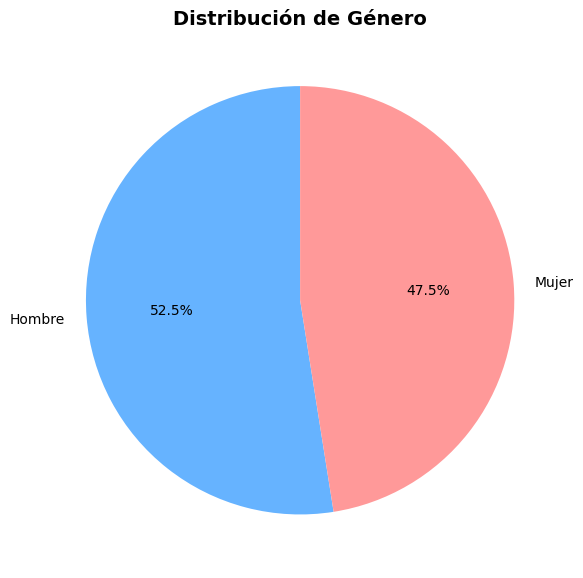

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con las etiquetas de género
genero_labels = {1: 'Hombre', 2: 'Mujer'}
df_genero = df_limpio['C207'].map(genero_labels).value_counts()

# Crear gráfico de pastel desde pandas directamente
ax = df_genero.plot(
    kind='pie',
    figsize=(6, 6),
    autopct='%1.1f%%',
    startangle=90,
    legend=False,
    ylabel='',  # elimina el texto del eje Y
    colors=['#66b3ff', '#ff9999']  # paleta de colores
)

# Título y estilo
plt.title('Distribución de Género', fontsize=14, weight='bold')
plt.gca().set_aspect('equal')  # asegurar forma circular
plt.tight_layout()
plt.show()


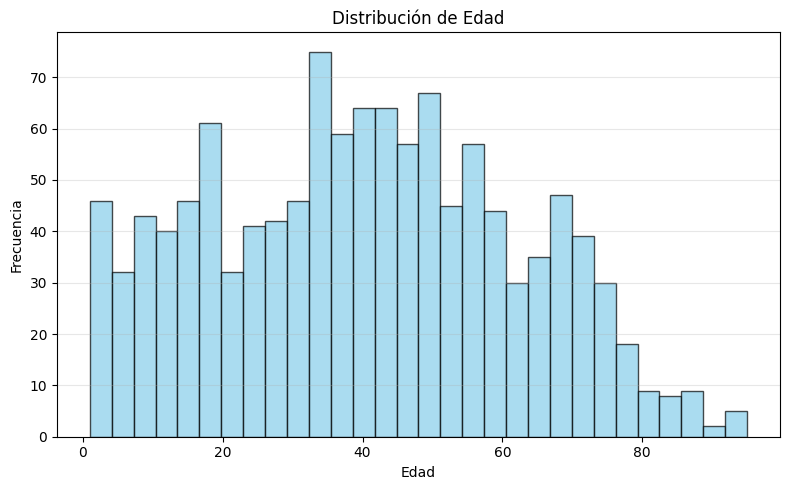

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_limpio["C208"].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


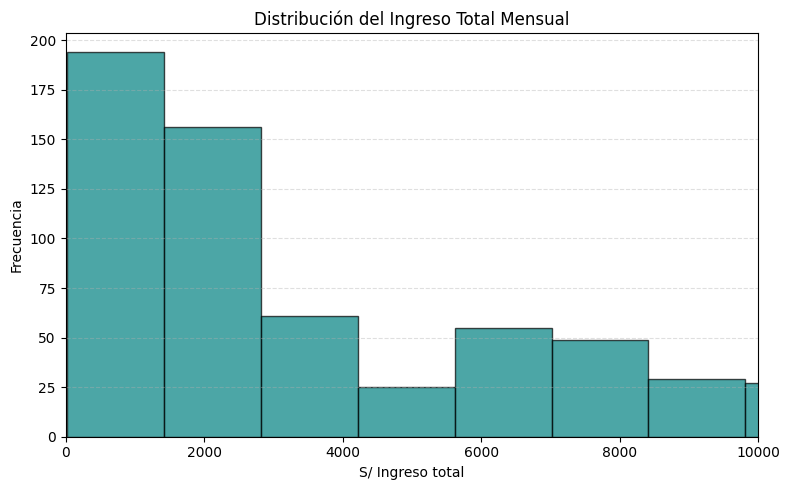

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_limpio["INGTOT"].dropna(), bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribución del Ingreso Total Mensual")
plt.xlabel("S/ Ingreso total")
plt.ylabel("Frecuencia")
plt.xlim(0, 10000)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [32]:
import plotly.express as px

df_plot = df_limpio.dropna(subset=["C207", "C208"]).copy()
df_plot["C207"] = df_plot["C207"].map({1: "Hombre", 2: "Mujer"})

fig = px.box(
    df_plot,
    x="C207",
    y="C208",
    points="all",
    title="Distribución de Edad por Sexo",
    template="plotly_white"  # tema claro
)

fig.update_layout(
    xaxis_title="Sexo",
    yaxis_title="Edad",
    font=dict(size=14),
    title_x=0.5  # Centra el título
)

fig.show()


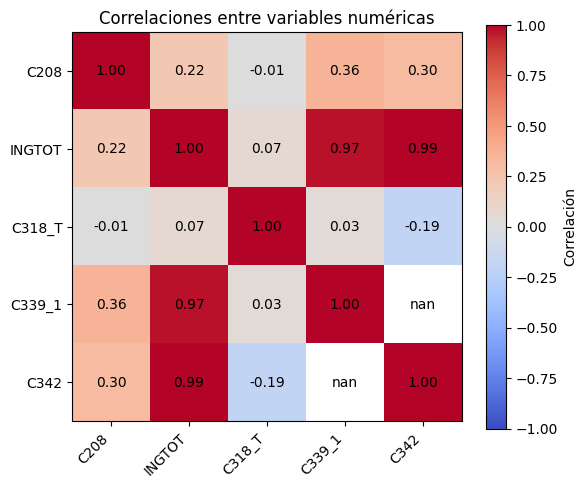

In [34]:
import matplotlib.pyplot as plt
import numpy as np

corr = df_limpio[["C208", "INGTOT", "C318_T", "C339_1", "C342"]].corr()

plt.figure(figsize=(6, 5))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, label="Correlación")

# Etiquetas de ejes
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title("Correlaciones entre variables numéricas")

# Mostrar valores dentro de cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


## Ocupados y desocupados

In [35]:
def filtrar_mayores14(df):
    return df[df["C303"].isin([1, 2])]

df_mas14 = filtrar_mayores14(df_limpio)
df_mas14.head()


,ANIO,MES,CONGLOMERADO,MUESTRA,SELVIV,HOGAR,REGION,LLAVE_PANEL,ESTRATO,C201,...,INGTOT,INGTOTP,ingtrabw,RESIDENT,fa_efm24,fa_amj24,fa_jas24,fa_son24,fa_efm25,fa_mam25
0,2024,1,24160.0,1,22,1,1,202401241601002211,1,1,...,NaN,NaN,NaN,1,1821.352732,NaN,NaN,NaN,NaN,NaN
1,2024,1,24160.0,1,22,1,1,202401241601002212,1,2,...,NaN,NaN,NaN,1,1850.890562,NaN,NaN,NaN,NaN,NaN
3,2024,1,21682.0,1,3,1,1,202310216821000311,1,1,...,1500.0,1500.0,1500.0,1,537.625700,NaN,NaN,NaN,NaN,NaN
4,2024,1,21682.0,1,3,1,1,202310216821000312,1,2,...,NaN,NaN,NaN,1,494.508819,NaN,NaN,NaN,NaN,NaN
5,2024,1,21682.0,1,3,1,1,202310216821000313,1,3,...,2133.0,2133.0,2183.0,1,652.032439,NaN,NaN,NaN,NaN,NaN


/tmp/ipython-input-1377113152.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




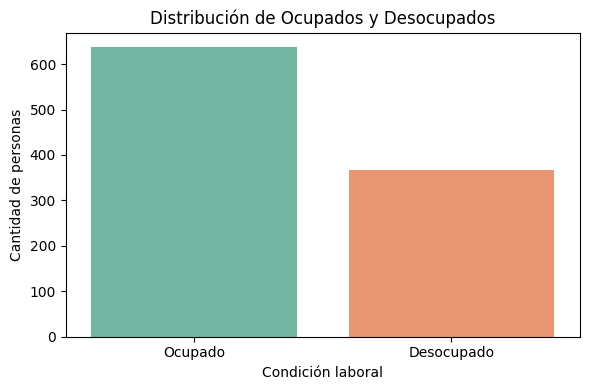

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

conteos = df_mas14['C303'].value_counts().rename_axis('Estado').reset_index(name='Frecuencia')
conteos['Etiqueta'] = conteos['Estado'].map({1: 'Ocupado', 2: 'Desocupado'})

plt.figure(figsize=(6, 4))
sns.barplot(data=conteos, x='Etiqueta', y='Frecuencia', palette='Set2')
plt.title('Distribución de Ocupados y Desocupados')
plt.xlabel('Condición laboral')
plt.ylabel('Cantidad de personas')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4249066031.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




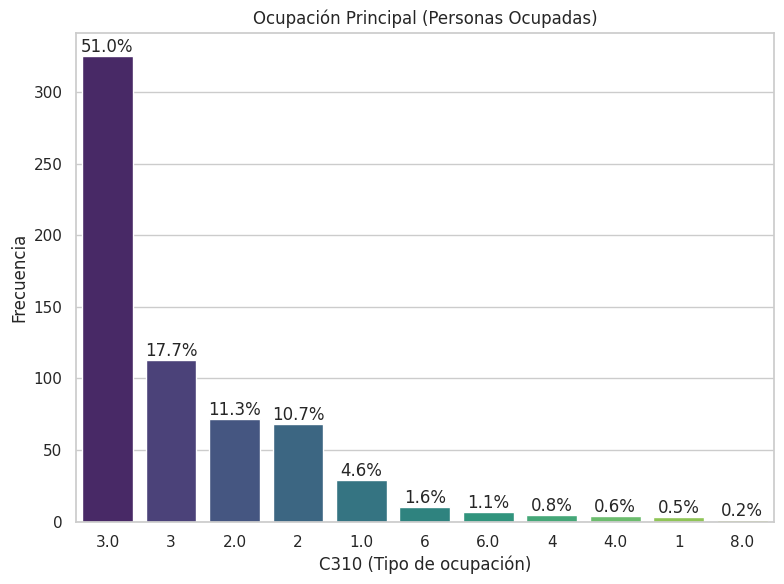

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar y calcular porcentajes
conteos = df_ocupados['C310'].value_counts().reset_index()
conteos.columns = ['C310', 'Frecuencia']
conteos['Porcentaje'] = conteos['Frecuencia'] / conteos['Frecuencia'].sum() * 100

plt.figure(figsize=(8, 6))
sns.barplot(data=conteos, x='C310', y='Frecuencia', palette='viridis')

# Añadir porcentajes
for i, row in conteos.iterrows():
    plt.text(i, row['Frecuencia'], f"{row['Porcentaje']:.1f}%", ha='center', va='bottom')

plt.title('Ocupación Principal (Personas Ocupadas)')
plt.xlabel('C310 (Tipo de ocupación)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


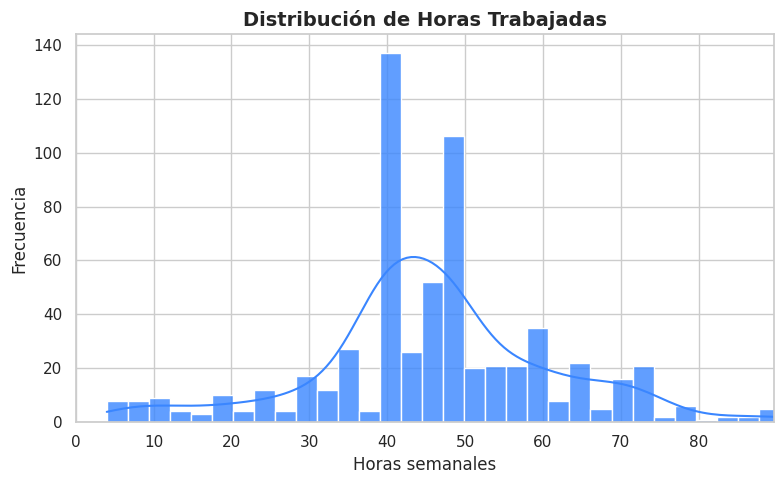

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo claro y limpio
sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_ocupados,
    x="whoraT",
    bins=40,
    kde=True,
    color="#3A86FF",
    edgecolor="white",
    alpha=0.8
)

plt.title("Distribución de Horas Trabajadas", fontsize=14, weight='bold')
plt.xlabel("Horas semanales", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xlim(0, df_ocupados["whoraT"].dropna().quantile(0.99))  # evita outliers extremos
plt.tight_layout()
plt.show()


/tmp/ipython-input-4197990779.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



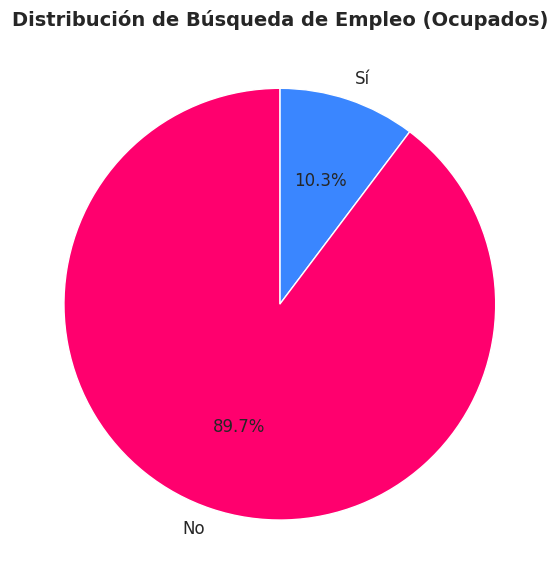

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que los datos sean numéricos (1, 2, etc.)
df_mas14['C335'] = pd.to_numeric(df_mas14['C335'], errors='coerce')

# Eliminar valores NaN si existen
conteos = df_mas14['C335'].dropna().value_counts().sort_index()

# Mapear etiquetas
etiquetas = conteos.index.map({1: 'Sí', 2: 'No'})

# Colores suaves
colores = ['#3A86FF', '#FF006E']

plt.figure(figsize=(6, 6))
plt.pie(
    conteos,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=colores,
    textprops={'fontsize': 12}
)
plt.title('Distribución de Búsqueda de Empleo (Ocupados)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3601777186.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




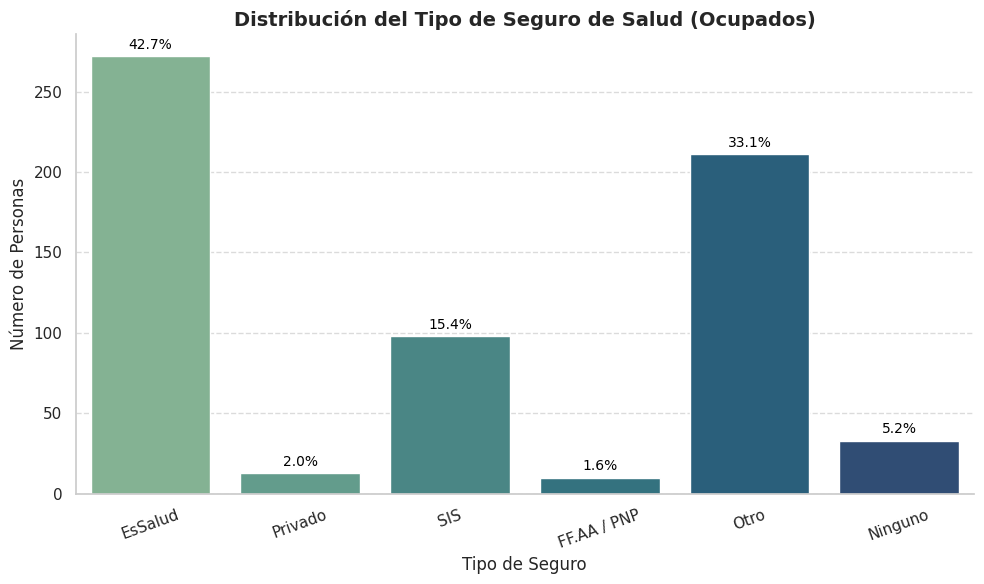

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copia limpia para evitar advertencias
df_seguro = df_ocupados.copy()

# Convertir el campo SEGURO1 a numérico por si hay valores mezclados
df_seguro['SEGURO1'] = pd.to_numeric(df_seguro['SEGURO1'], errors='coerce')

# Crear el conteo
conteos = df_seguro['SEGURO1'].value_counts().sort_index()

# Mapear códigos a nombres (ajusta si tienes otra codificación)
mapa_seguros = {
    1: "EsSalud",
    2: "Privado",
    3: "SIS",
    4: "FF.AA / PNP",
    5: "Otro",
    6: "Ninguno"
}
df_plot = pd.DataFrame({
    "Tipo de Seguro": conteos.index.map(mapa_seguros),
    "Cantidad": conteos.values
})

# Calcular porcentajes
df_plot["Porcentaje"] = (df_plot["Cantidad"] / df_plot["Cantidad"].sum()) * 100

# Gráfico con seaborn pero distinto estilo
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="Tipo de Seguro",
    y="Cantidad",
    palette="crest"
)

# Mostrar porcentajes encima de las barras
for i, row in df_plot.iterrows():
    plt.text(i, row["Cantidad"] + df_plot["Cantidad"].max() * 0.01, f"{row['Porcentaje']:.1f}%",
             ha='center', va='bottom', fontsize=10, color='black')

# Estética del gráfico
plt.title("Distribución del Tipo de Seguro de Salud (Ocupados)", fontsize=14, weight='bold')
plt.xlabel("Tipo de Seguro", fontsize=12)
plt.ylabel("Número de Personas", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()


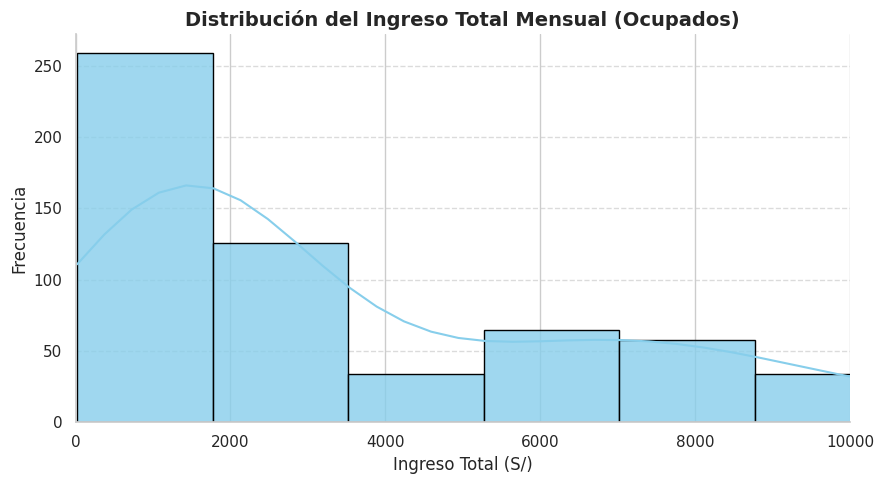

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo más limpio
sns.set(style="whitegrid")

plt.figure(figsize=(9, 5))
sns.histplot(
    data=df_ocupados,
    x="INGTOTP",
    bins=40,
    kde=True,
    color="skyblue",
    edgecolor="black",
    alpha=0.8
)

# Títulos y etiquetas
plt.title("Distribución del Ingreso Total Mensual (Ocupados)", fontsize=14, weight='bold')
plt.xlabel("Ingreso Total (S/)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xlim(0, 10000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()


In [54]:
mapa_nombres = {
    # Identificación y hogar
    'ANIO': 'anio',
    'MES': 'mes',
    'CONGLOMERADO': 'conglomerado',
    'MUESTRA': 'muestra',
    'SELVIV': 'seleccion_vivienda',
    'HOGAR': 'hogar',
    'REGION': 'region',
    'LLAVE_PANEL': 'llave_panel',
    'ESTRATO': 'estrato',

    # Características hogar
    'C201': 'codigo_persona',
    'C203': 'parentesco_jefe',
    'C204': 'miembro_hogar',
    'C205': 'ausente_30dias',
    'C206': 'presente_30dias',
    'C207': 'sexo',
    'C208': 'edad',

    # Empleo - identificación
    'C300n': 'codigo_persona_empleo',
    'NROINF': 'codigo_informante_empleo',

    # Fecha de nacimiento
    'C301_DIA': 'fecha_nacimiento_dia',
    'C301_MES': 'fecha_nacimiento_mes',
    'C301_ANIO': 'fecha_nacimiento_anio',

    # Condición de actividad
    'C303': 'trabajo_semana_pasada',
    'C304': 'empleo_fijo_proximo',
    'C305': 'negocio_propio_proximo',

    # Actividades realizadas (C306)
    'C306_1': 'actividad_negocio_propio',
    'C306_2': 'actividad_servicio',
    'C306_3': 'actividad_en_casa',
    'C306_4': 'actividad_venta_productos',
    'C306_5': 'actividad_artesanal',
    'C306_6': 'actividad_practicas_pagadas',
    'C306_7': 'actividad_hogar_particular',
    'C306_8': 'actividad_fabricar_producto',
    'C306_9': 'actividad_chacra_animales',
    'C306_10': 'actividad_ayuda_familiar',
    'C306_10A': 'actividad_ayuda_empleo_familiar',
    'C306_11': 'actividad_otra',
    'C306A': 'productor_agricola_pecuario',

    # Ocupación principal
    'C308_COD': 'ocupacion_principal_codigo',
    'C309_COD': 'actividad_empresa_codigo',
    'C310': 'condicion_laboral',
    'C311': 'tipo_empleador',
    'C312': 'empresa_registrada_sunat',
    'C313': 'empresa_contabilidad',

    # Tamaño empresa
    'C317': 'tamano_empresa_categoria',
    'C317A': 'tamano_empresa_numero',

    # Horas trabajadas
    'C318_1': 'horas_domingo',
    'C318_2': 'horas_lunes',
    'C318_3': 'horas_martes',
    'C318_4': 'horas_miercoles',
    'C318_5': 'horas_jueves',
    'C318_6': 'horas_viernes',
    'C318_7': 'horas_sabado',
    'C318_T': 'horas_trabajadas_total',
    'C328_T': 'horas_ocupaciones_secundarias',
    'whoraT': 'horas_trabajadas_total_ocupado',

    # Otras variables ocupación
    'C330': 'horas_habituales',
    'C331': 'horas_semana_normal',
    'C333': 'quiso_trabajar_mas',
    'C334': 'disponible_trabajar_mas',
    'P209H': 'subempleo_horas',
    'C335': 'busco_otro_trabajo',

    # Ingresos dependientes
    'C338': 'tipo_pago_principal',
    'C339_1': 'ingreso_monetario_principal',
    'C341_T': 'ingreso_especie_principal',

    # Ingresos independientes
    'C342': 'ganancia_neta_principal',
    'C344': 'valor_autoconsumo_principal',

    # Ingresos ocupación secundaria
    'C345_1': 'ingreso_monetario_secundario',
    'C347_T': 'ingreso_especie_secundario',
    'C348': 'ganancia_neta_secundaria',
    'C350': 'valor_autoconsumo_secundaria',

    # Desocupados
    'C352': 'busco_trabajo_semana',
    'C353': 'actividad_semana_pasada',
    'C354': 'queria_trabajar',
    'C355': 'disponible_trabajar',
    'C356': 'motivo_no_busqueda',
    'C357_I': 'gestion_principal_busqueda',
    'C358': 'semanas_busqueda',

    # Experiencia laboral
    'C359': 'ha_trabajado_antes',

    # Seguro de salud
    'SEGURO1': 'tipo_seguro_salud',
    'C361_1': 'es_afiliado_essalud',
    'C362_1': 'quien_aporta_essalud',
    'C361_2': 'es_afiliado_privado',
    'C362_2': 'quien_aporta_privado',
    'C361_3': 'es_afiliado_entidad',
    'C362_3': 'quien_aporta_entidad',
    'C361_4': 'es_afiliado_ffaa',
    'C362_4': 'quien_aporta_ffaa',
    'C361_5': 'es_afiliado_sis',
    'C362_5': 'quien_aporta_sis',
    'C361_6': 'es_afiliado_universitario',
    'C362_6': 'quien_aporta_universitario',
    'C361_7': 'es_afiliado_escolar_privado',
    'C362_7': 'quien_aporta_escolar_privado',
    'C361_8': 'es_afiliado_otro',
    'C362_8': 'quien_aporta_otro',

    # Pensiones
    'C364_1': 'afiliado_afp',
    'C365_1': 'quien_aporta_afp',
    'C364_2': 'afiliado_snp_19990',
    'C365_2': 'quien_aporta_snp_19990',
    'C364_3': 'afiliado_snp_20530',
    'C365_3': 'quien_aporta_snp_20530',
    'C364_4': 'afiliado_otro_pension',
    'C365_4': 'quien_aporta_otro_pension',

    # Educación
    'C366': 'nivel_educativo',
    'C366_1': 'anio_educacion',
    'C366_2': 'grado_educacion',

    # Discapacidad
    'C375_1': 'discapacidad_motora',
    'C375_2': 'discapacidad_visual',
    'C375_3': 'discapacidad_comunicacion',
    'C375_4': 'discapacidad_auditiva',
    'C375_5': 'discapacidad_cognitiva',
    'C375_6': 'discapacidad_relacional',

    # Etnicidad
    'C376': 'lengua_materna',
    'C377': 'autoidentificacion_etnica',

    # Ocupación (condición de actividad final)
    'OCUP300': 'condicion_actividad',

    # Ingresos mensualizados
    'I339_1': 'ingreso_mensual_dependiente_principal',
    'D341_T': 'ingreso_mensual_especie_dependiente',
    'I342': 'ingreso_mensual_independiente_principal',
    'D344': 'ingreso_mensual_especie_independiente',
    'I345_1': 'ingreso_mensual_dependiente_secundario',
    'I348': 'ingreso_mensual_independiente_secundario',
    'D347_T': 'ingreso_mensual_especie_dependiente_secundario',
    'D350': 'ingreso_mensual_especie_independiente_secundario',
    'D351_T': 'ingreso_mensual_extraordinario_12meses',

    # Totales de ingresos
    'INGTOT': 'ingreso_total',
    'INGTOTP': 'ingreso_principal',
    'INGTRABW': 'ingreso_trabajo_total',

    # Otros
    'RESIDENT': 'residente_habitual',
    'fa_efm24': 'factor_expansion'
}

df.rename(columns=mapa_nombres, inplace=True)

df.columns.tolist()

['anio',
 'mes',
 'conglomerado',
 'muestra',
 'seleccion_vivienda',
 'hogar',
 'region',
 'llave_panel',
 'estrato',
 'codigo_persona',
 'parentesco_jefe',
 'miembro_hogar',
 'ausente_30dias',
 'presente_30dias',
 'sexo',
 'edad',
 'codigo_persona_empleo',
 'codigo_informante_empleo',
 'fecha_nacimiento_dia',
 'fecha_nacimiento_mes',
 'fecha_nacimiento_anio',
 'trabajo_semana_pasada',
 'empleo_fijo_proximo',
 'negocio_propio_proximo',
 'actividad_negocio_propio',
 'actividad_servicio',
 'actividad_en_casa',
 'actividad_venta_productos',
 'actividad_artesanal',
 'actividad_practicas_pagadas',
 'actividad_hogar_particular',
 'actividad_fabricar_producto',
 'actividad_chacra_animales',
 'actividad_ayuda_familiar',
 'actividad_ayuda_empleo_familiar',
 'actividad_otra',
 'productor_agricola_pecuario',
 'ocupacion_principal_codigo',
 'actividad_empresa_codigo',
 'condicion_laboral',
 'tipo_empleador',
 'empresa_registrada_sunat',
 'empresa_contabilidad',
 'tamano_empresa_categoria',
 'taman

 Primeras 10 filas del DataFrame:


,edad,nivel_educativo
0,40.0,6
1,43.0,6
2,13.0,NaN
3,62.0,8
4,70.0,4
5,38.0,9
6,8.0,NaN
7,47.0,6
8,24.0,6
9,39.0,6



 Resumen estadístico por nivel educativo:
                 count   mean    std   min    25%   50%    75%   max
nivel_educativo                                                     
1.0                5.0  60.00  10.07  47.0  52.00  63.0  68.00  70.0
2.0                2.0  69.00  14.14  59.0  64.00  69.0  74.00  79.0
3.0               30.0  60.07  18.04  19.0  46.75  64.5  75.00  90.0
4.0               37.0  63.16  19.62  28.0  43.00  68.0  81.00  94.0
5.0               97.0  35.41  23.32  14.0  15.00  22.0  58.00  86.0
6.0              246.0  44.93  18.37  16.0  32.00  44.0  57.75  87.0
8.0               32.0  38.62  13.63  17.0  27.00  39.0  48.00  67.0
9.0               65.0  46.29  13.53  23.0  36.00  44.0  55.00  77.0
10.0              73.0  39.45  20.05  17.0  21.00  33.0  56.00  94.0
11.0             188.0  46.95  15.08  22.0  35.00  44.0  57.25  94.0
12.0              77.0  50.42   9.97  29.0  45.00  52.0  57.00  73.0
1                  4.0  70.00  16.83  54.0  56.25  70.0  83.

/tmp/ipython-input-2905611733.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




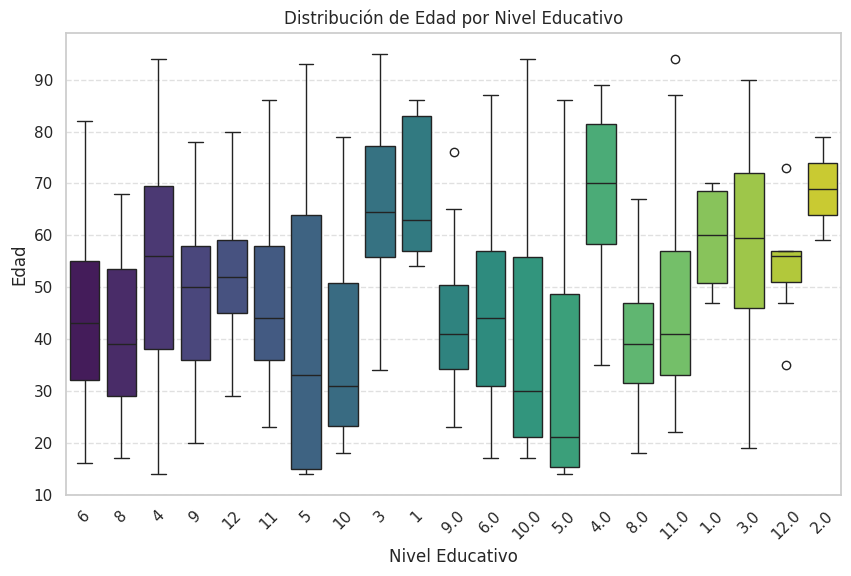

/tmp/ipython-input-2905611733.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




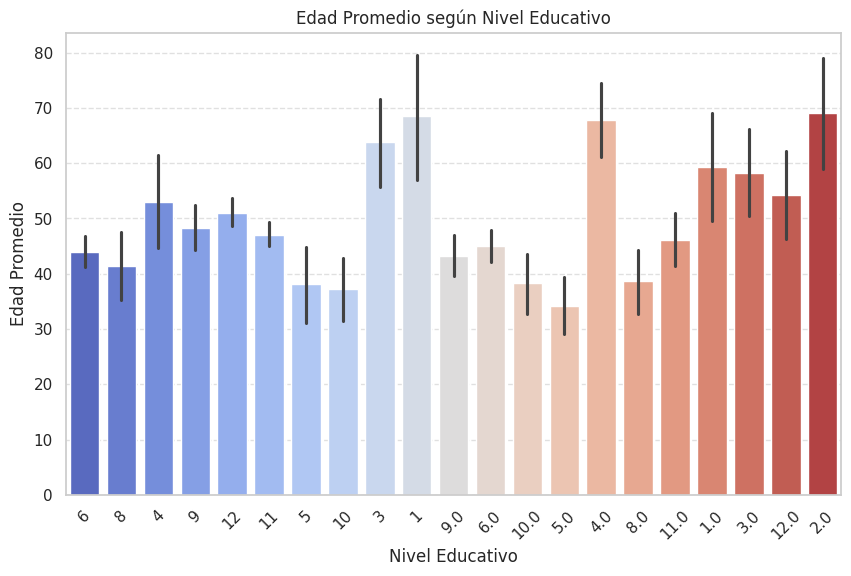

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vista rápida de las primeras filas
print(" Primeras 10 filas del DataFrame:")
display(df[['edad', 'nivel_educativo']].head(10))

# Resumen estadístico de la edad por nivel educativo
print("\n Resumen estadístico por nivel educativo:")
print(df.groupby('nivel_educativo')['edad'].describe().round(2))

# Conteo de personas por nivel educativo
print("\n Cantidad de personas por nivel educativo:")
print(df['nivel_educativo'].value_counts())

# Visualización 1: Distribución de edad por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nivel_educativo', y='edad', palette='viridis')
plt.title("Distribución de Edad por Nivel Educativo")
plt.xticks(rotation=45)
plt.ylabel("Edad")
plt.xlabel("Nivel Educativo")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Visualización 2: Promedio de edad por nivel educativo
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='nivel_educativo', y='edad', estimator='mean', palette='coolwarm')
plt.title("Edad Promedio según Nivel Educativo")
plt.xticks(rotation=45)
plt.ylabel("Edad Promedio")
plt.xlabel("Nivel Educativo")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Correlación

### Estadisticas descriptivas

 Estadísticas descriptivas generales:
         count         mean          std   min     25%     50%     75%  \
C208     651.0    44.233487    13.770230  15.0    34.0    43.0    55.0   
whoraT   651.0    45.615975    16.415939   2.0    40.0    45.0    54.0   
INGTOT   651.0  4534.221198  5283.525229  20.0  1241.5  2400.0  7000.0   
INGTOTP  651.0  4328.741935  5055.864415  20.0  1200.0  2172.0  6600.0   

             max    rango     IQR  
C208        83.0     68.0    21.0  
whoraT     112.0    110.0    14.0  
INGTOT   70000.0  69980.0  5758.5  
INGTOTP  70000.0  69980.0  5400.0  


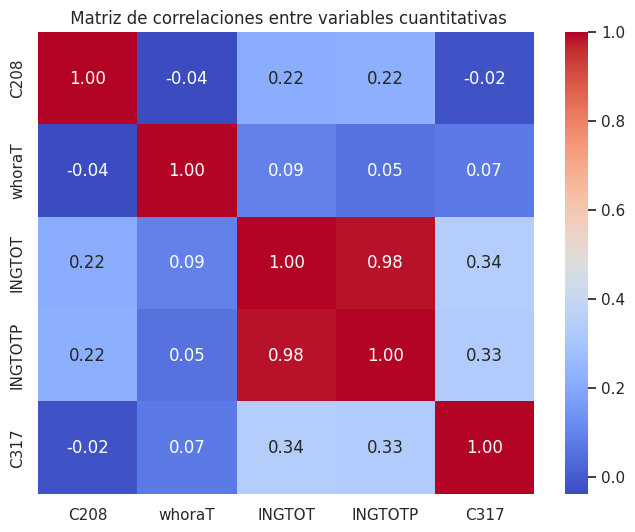

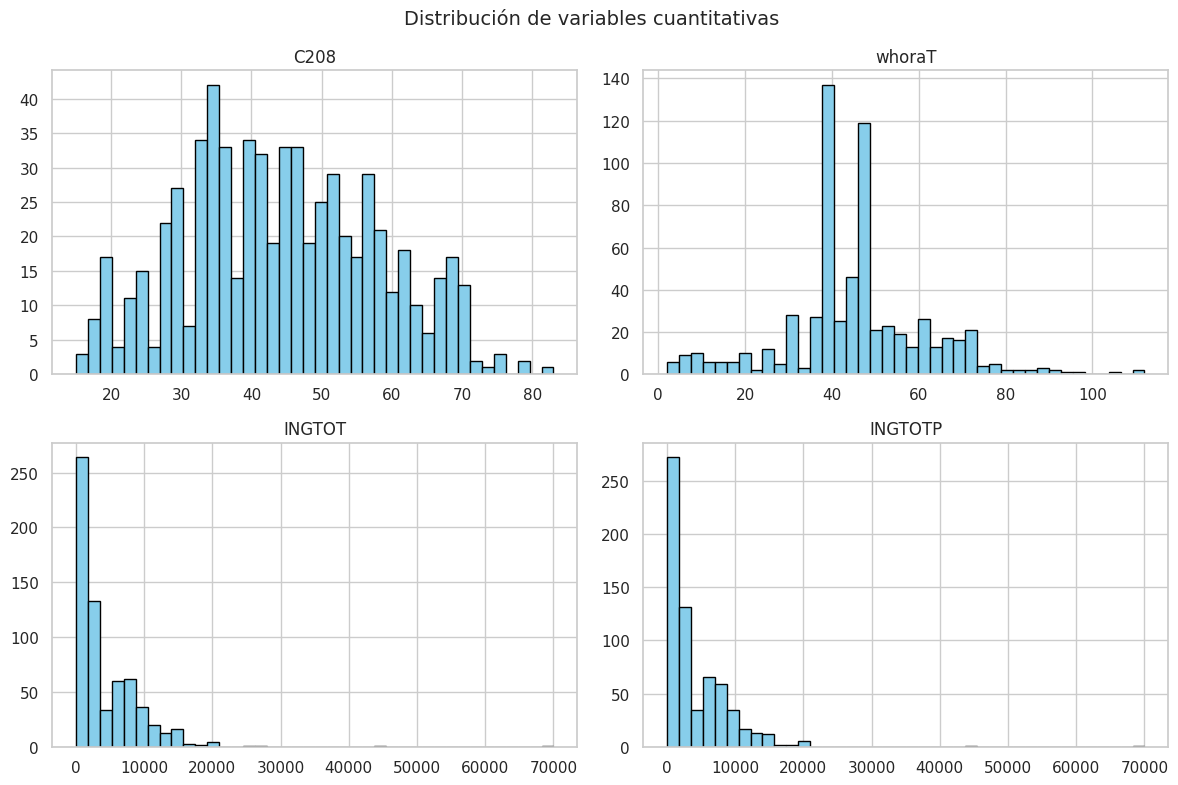

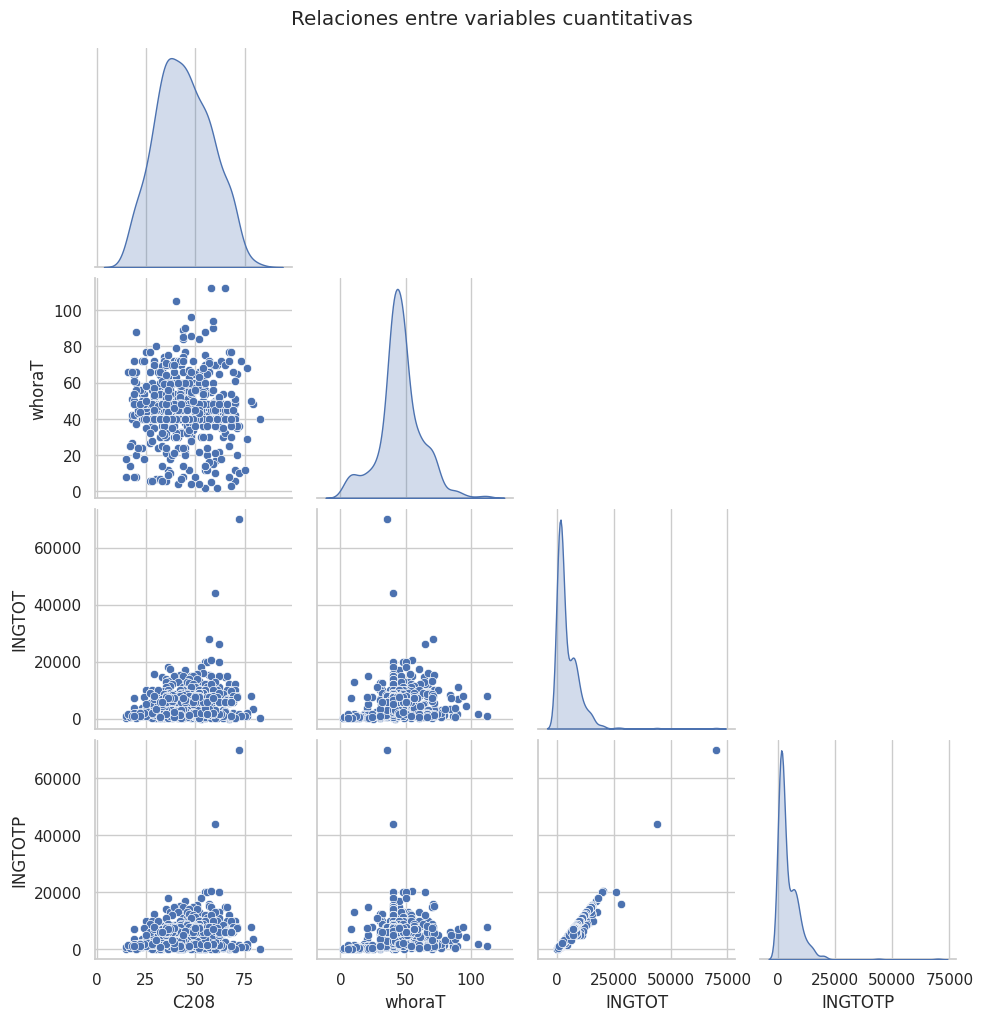

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============
# FILTRADO BASE
# ============
df_eda = df_limpio[df_limpio['C208'] >= 14].copy()
df_eda = df_eda[df_eda['INGTOT'] < 100000]
df_eda2 = df_eda.copy()

# ===============
# VARIABLES CUANTITATIVAS
# ===============
vars_cuant = ['C208', 'whoraT', 'INGTOT', 'INGTOTP', 'C317']

print(" Estadísticas descriptivas generales:")
desc = df_eda[vars_cuant].describe().T
desc["rango"] = desc["max"] - desc["min"]
desc["IQR"] = desc["75%"] - desc["25%"]
print(desc)

# ===============
# MATRIZ DE CORRELACIÓN
# ===============
plt.figure(figsize=(8,6))
sns.heatmap(df_eda[vars_cuant].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Matriz de correlaciones entre variables cuantitativas")
plt.show()

# ===============
# HISTOGRAMAS
# ===============
df_eda[vars_cuant].hist(bins=40, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables cuantitativas", fontsize=14)
plt.tight_layout()
plt.show()

# ===============
# PAIRPLOT (RELACIONES ENTRE VARIABLES)
# ===============
sns.pairplot(df_eda[vars_cuant], diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre variables cuantitativas", y=1.02)
plt.show()


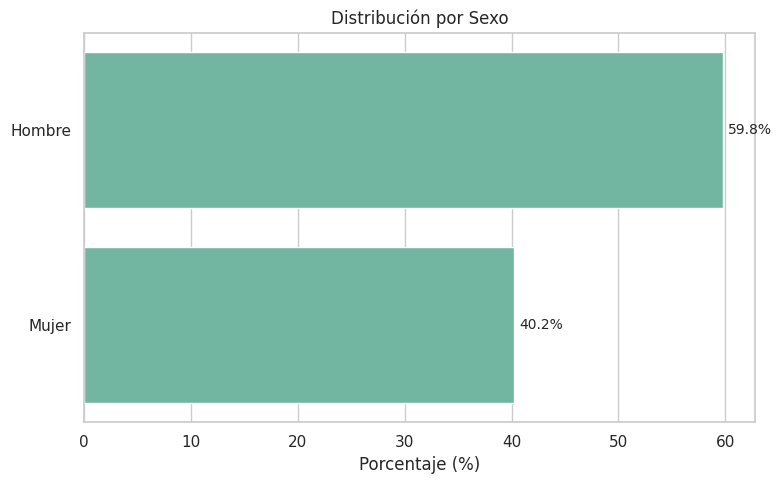

 Distribución de distribución por sexo:
sexo
Hombre    59.75
Mujer     40.25
Name: proportion, dtype: float64
--------------------------------------------------


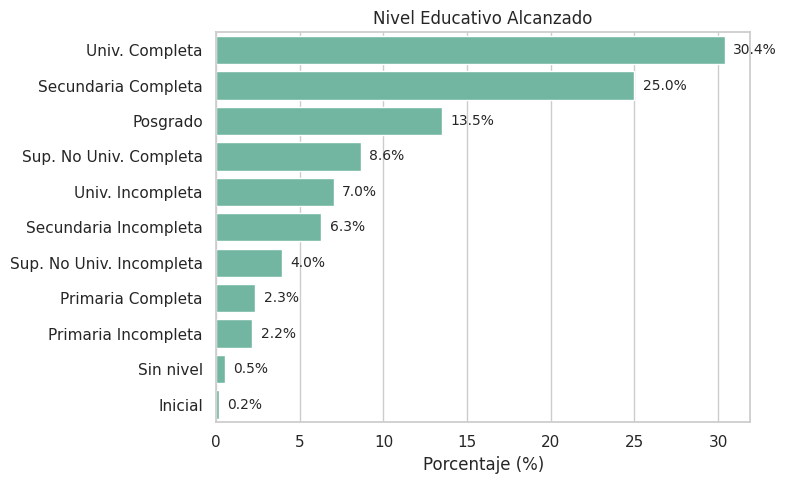

 Distribución de nivel educativo alcanzado:
educacion
Univ. Completa              30.40
Secundaria Completa         25.00
Posgrado                    13.49
Sup. No Univ. Completa       8.63
Univ. Incompleta             7.01
Secundaria Incompleta        6.29
Sup. No Univ. Incompleta     3.96
Primaria Completa            2.34
Primaria Incompleta          2.16
Sin nivel                    0.54
Inicial                      0.18
Name: proportion, dtype: float64
--------------------------------------------------


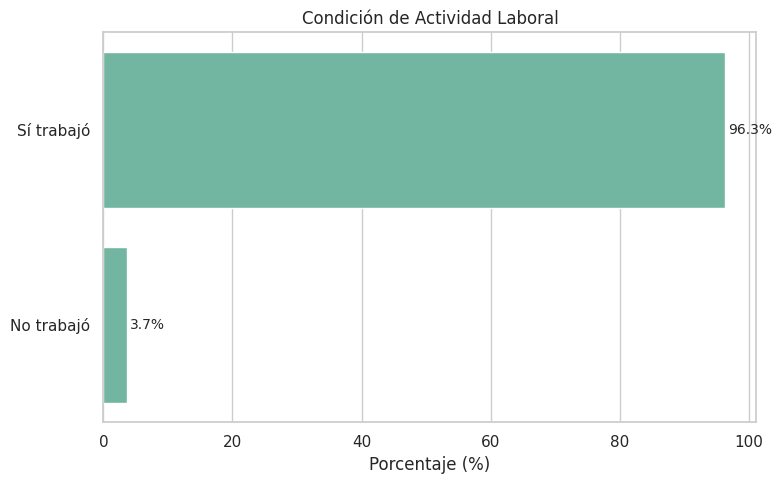

 Distribución de condición de actividad laboral:
activo
Sí trabajó    96.31
No trabajó     3.69
Name: proportion, dtype: float64
--------------------------------------------------


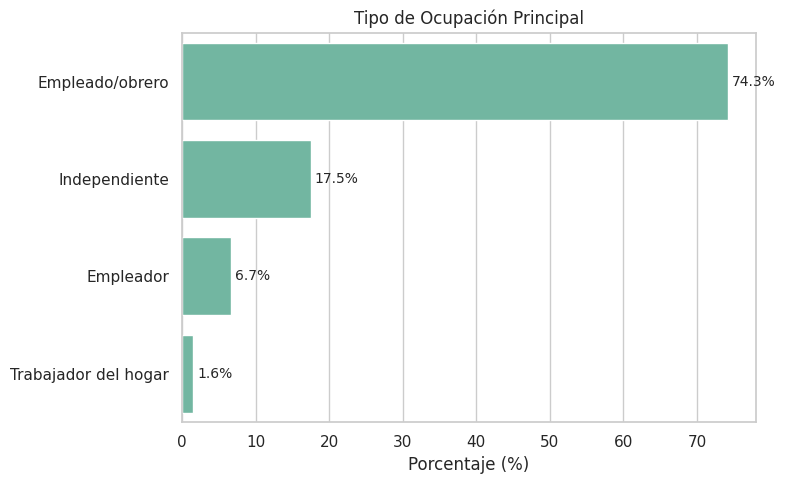

 Distribución de tipo de ocupación principal:
ocupacion
Empleado/obrero         74.28
Independiente           17.52
Empleador                6.65
Trabajador del hogar     1.55
Name: proportion, dtype: float64
--------------------------------------------------


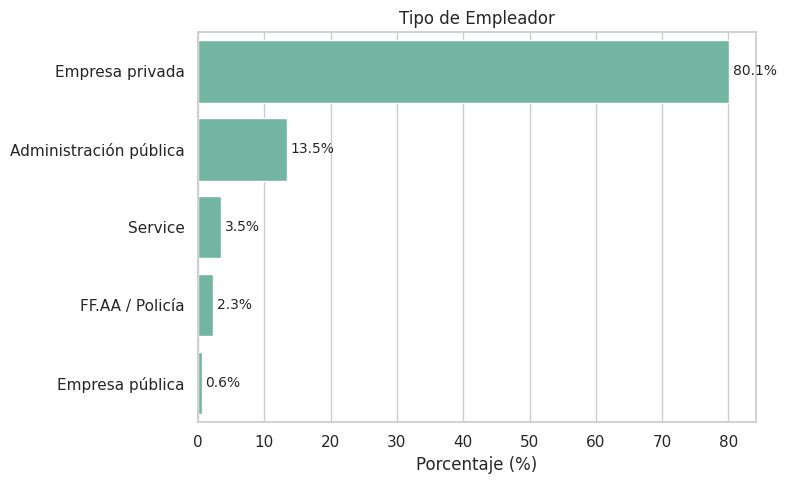

 Distribución de tipo de empleador:
empleador
Empresa privada           80.12
Administración pública    13.45
Service                    3.51
FF.AA / Policía            2.34
Empresa pública            0.58
Name: proportion, dtype: float64
--------------------------------------------------


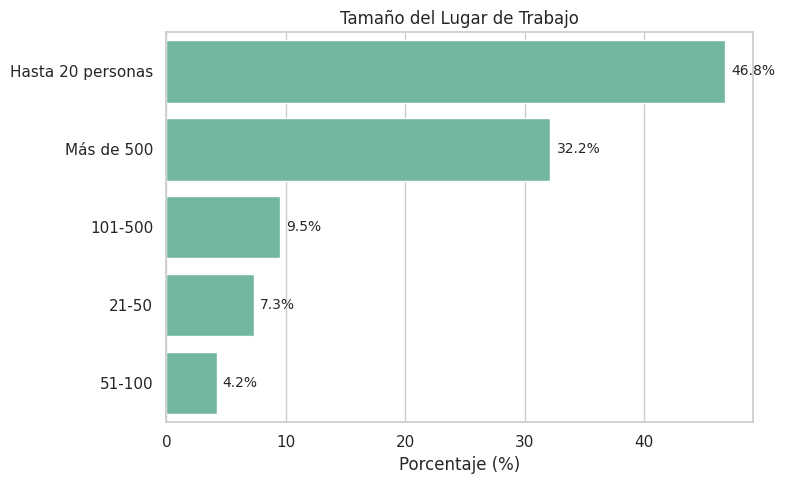

 Distribución de tamaño del lugar de trabajo:
tamano_empresa
Hasta 20 personas    46.78
Más de 500           32.15
101-500               9.53
21-50                 7.32
51-100                4.21
Name: proportion, dtype: float64
--------------------------------------------------


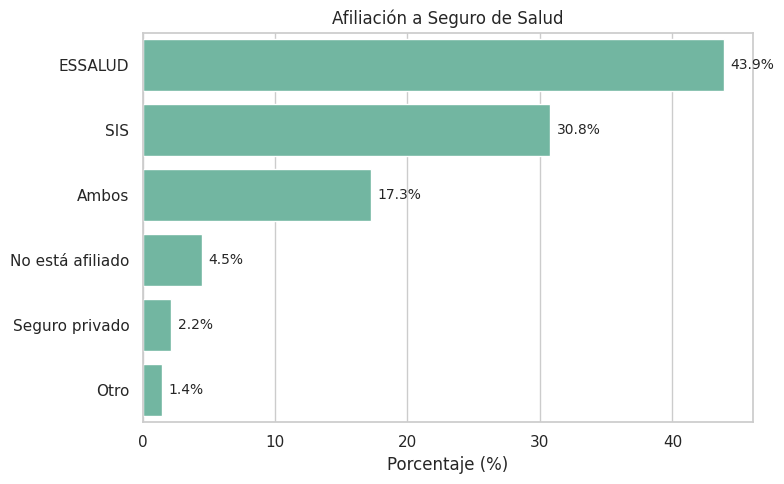

 Distribución de afiliación a seguro de salud:
seguro
ESSALUD             43.88
SIS                 30.76
Ambos               17.27
No está afiliado     4.50
Seguro privado       2.16
Otro                 1.44
Name: proportion, dtype: float64
--------------------------------------------------


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2")

def plot_categorical_distribution(df, col, title):
    conteo = df[col].value_counts(normalize=True).sort_values(ascending=False) * 100
    plt.figure(figsize=(8, 5))
    sns.barplot(x=conteo.values, y=conteo.index)
    plt.title(title)
    plt.xlabel("Porcentaje (%)")
    plt.ylabel("")

    # Mostrar etiquetas de porcentaje en las barras
    for i, v in enumerate(conteo.values):
        plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Mostrar resumen textual
    print(f" Distribución de {title.lower()}:")
    print(conteo.round(2))
    print("-" * 50)


# === VARIABLES CATEGÓRICAS ===

# Sexo
df_eda['sexo'] = df_eda['C207'].replace({1: 'Hombre', 2: 'Mujer'})
plot_categorical_distribution(df_eda, 'sexo', 'Distribución por Sexo')

# Nivel educativo
nivel_educativo = {
    1: 'Sin nivel', 2: 'Inicial', 3: 'Primaria Incompleta', 4: 'Primaria Completa',
    5: 'Secundaria Incompleta', 6: 'Secundaria Completa', 7: 'Básica especial',
    8: 'Sup. No Univ. Incompleta', 9: 'Sup. No Univ. Completa',
    10: 'Univ. Incompleta', 11: 'Univ. Completa', 12: 'Posgrado'
}
df_eda['educacion'] = df_eda['C366'].map(nivel_educativo)
plot_categorical_distribution(df_eda, 'educacion', 'Nivel Educativo Alcanzado')

# Actividad laboral
df_eda['activo'] = df_eda['C303'].replace({1: 'Sí trabajó', 2: 'No trabajó'})
plot_categorical_distribution(df_eda, 'activo', 'Condición de Actividad Laboral')

# Tipo de ocupación
ocupacion_map = {
    1: 'Empleador', 2: 'Independiente', 3: 'Empleado/obrero', 4: 'Ayudante familiar',
    5: 'Ayudante empleo familiar', 6: 'Trabajador del hogar', 7: 'Practicante remunerado',
    8: 'Practicante no remunerado', 9: 'Ayudante otro hogar', 10: 'Ayudante empleo otro hogar'
}
df_eda['ocupacion'] = df_eda['C310'].map(ocupacion_map)
plot_categorical_distribution(df_eda, 'ocupacion', 'Tipo de Ocupación Principal')

# Tipo de empleador
empleador_map = {
    1: 'FF.AA / Policía', 2: 'Administración pública', 3: 'Empresa pública',
    4: 'Service', 5: 'Empresa privada', 6: 'Otro'
}
df_eda['empleador'] = df_eda['C311'].map(empleador_map)
plot_categorical_distribution(df_eda, 'empleador', 'Tipo de Empleador')

# Tamaño de la empresa
tamano_empresa = {
    1: 'Hasta 20 personas', 2: '21-50', 3: '51-100',
    4: '101-500', 5: 'Más de 500'
}
df_eda['tamano_empresa'] = df_eda['C317'].map(tamano_empresa)
plot_categorical_distribution(df_eda, 'tamano_empresa', 'Tamaño del Lugar de Trabajo')

# Seguro de salud
seguro_map = {
    1: 'ESSALUD', 2: 'Seguro privado', 3: 'Ambos',
    4: 'Otro', 5: 'SIS', 6: 'No está afiliado'
}
df_eda['seguro'] = df_eda['SEGURO1'].map(seguro_map)
plot_categorical_distribution(df_eda, 'seguro', 'Afiliación a Seguro de Salud')


In [59]:
import matplotlib.pyplot as plt

def mostrar_tabla_como_imagen(df, titulo="Tabla", figsize=(8, 2.5), fontsize=11):
    """
    Muestra un DataFrame como imagen sin usar tabulate.
    """
    # Crear figura
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # Crear tabla
    tabla = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )

    # Ajustes de estilo
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(fontsize)
    tabla.scale(1.1, 1.3)  # ancho y alto de celdas
    tabla.auto_set_column_width(col=list(range(len(df.columns))))

    # Título
    plt.title(titulo, fontsize=13, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()


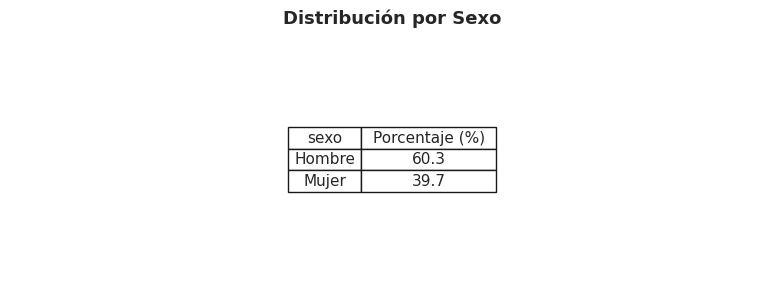

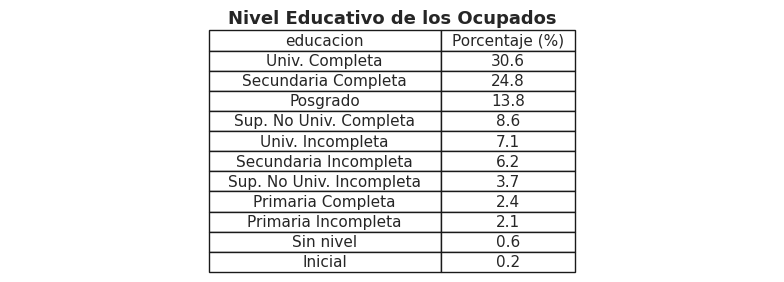

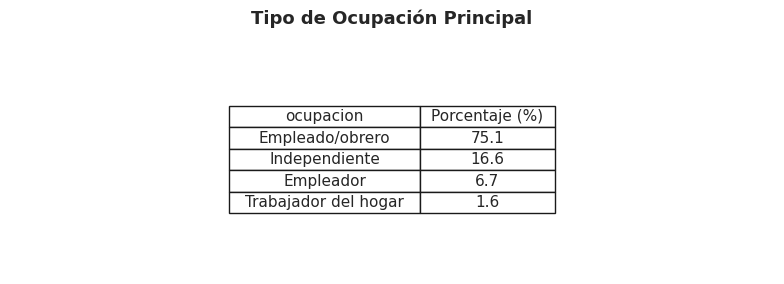

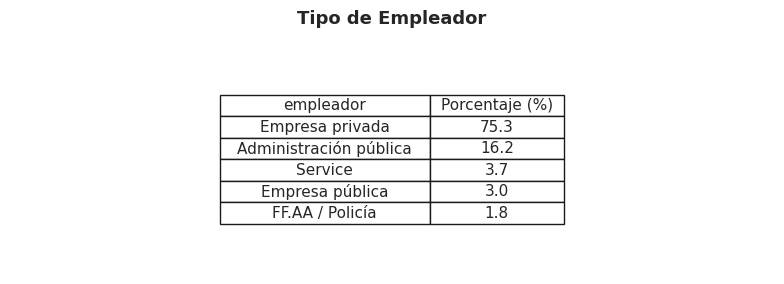

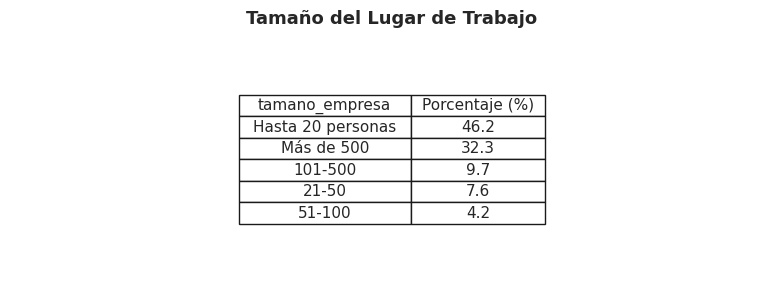

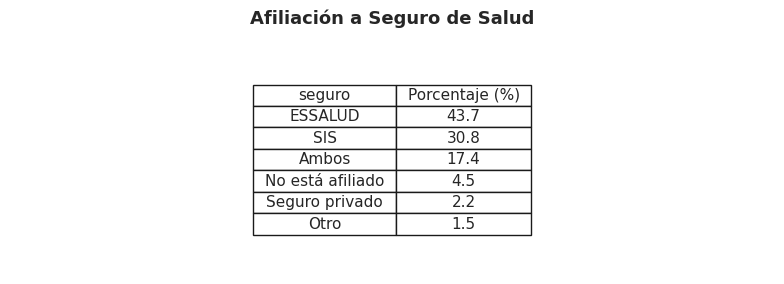

In [60]:
import matplotlib.pyplot as plt

# ===================================
# FUNCIÓN: Mostrar tabla sin tabulate
# ===================================
def mostrar_tabla_como_imagen(df, titulo="Tabla", figsize=(8, 3), fontsize=11):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # Crear tabla
    tabla = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(fontsize)
    tabla.scale(1.1, 1.3)
    tabla.auto_set_column_width(col=list(range(len(df.columns))))

    plt.title(titulo, fontsize=13, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()


# =============================
# 1. FILTRAR SOLO OCUPADOS
# =============================
df_eda = df_limpio.copy()
df_eda = df_eda[df_eda['C208'] >= 14]           # Edad 14+
df_eda = df_eda[df_eda['INGTOT'] < 100000]      # Quitar ingresos extremos
df_eda = df_eda[df_eda['C303'] == 1]            # Solo ocupados


# =============================
# 2. VARIABLES CATEGÓRICAS
# =============================
df_eda['sexo'] = df_eda['C207'].replace({1: 'Hombre', 2: 'Mujer'})

df_eda['educacion'] = df_eda['C366'].map({
    1: 'Sin nivel', 2: 'Inicial', 3: 'Primaria Incompleta', 4: 'Primaria Completa',
    5: 'Secundaria Incompleta', 6: 'Secundaria Completa', 7: 'Básica especial',
    8: 'Sup. No Univ. Incompleta', 9: 'Sup. No Univ. Completa',
    10: 'Univ. Incompleta', 11: 'Univ. Completa', 12: 'Posgrado'
})

df_eda['activo'] = 'Sí trabajó'  # todos lo están

df_eda['ocupacion'] = df_eda['C310'].map({
    1: 'Empleador', 2: 'Independiente', 3: 'Empleado/obrero', 4: 'Ayudante familiar',
    5: 'Ayudante empleo familiar', 6: 'Trabajador del hogar', 7: 'Practicante remunerado',
    8: 'Practicante no remunerado', 9: 'Ayudante otro hogar', 10: 'Ayudante empleo otro hogar'
})

df_eda['C311'] = pd.to_numeric(df_eda['C311'], errors='coerce')
df_eda['empleador'] = df_eda['C311'].map({
    1: 'FF.AA / Policía', 2: 'Administración pública', 3: 'Empresa pública',
    4: 'Service', 5: 'Empresa privada', 6: 'Otro'
})

df_eda['tamano_empresa'] = df_eda['C317'].map({
    1: 'Hasta 20 personas', 2: '21-50', 3: '51-100', 4: '101-500', 5: 'Más de 500'
})

df_eda['seguro'] = df_eda['SEGURO1'].map({
    1: 'ESSALUD', 2: 'Seguro privado', 3: 'Ambos', 4: 'Otro', 5: 'SIS', 6: 'No está afiliado'
})


# =============================
# 3. MOSTRAR TABLAS RESUMEN
# =============================

def resumen_categorica(df, variable, titulo):
    resumen = (
        df[variable]
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .reset_index()
    )
    resumen.columns = [variable, "Porcentaje (%)"]
    mostrar_tabla_como_imagen(resumen, titulo=titulo)


# Mostrar resúmenes visuales
resumen_categorica(df_eda, 'sexo', "Distribución por Sexo")
resumen_categorica(df_eda, 'educacion', "Nivel Educativo de los Ocupados")
resumen_categorica(df_eda, 'ocupacion', "Tipo de Ocupación Principal")
resumen_categorica(df_eda, 'empleador', "Tipo de Empleador")
resumen_categorica(df_eda, 'tamano_empresa', "Tamaño del Lugar de Trabajo")
resumen_categorica(df_eda, 'seguro', "Afiliación a Seguro de Salud")


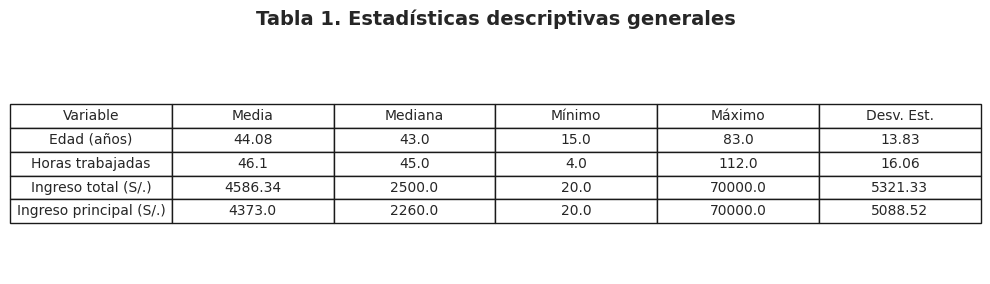

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# === Nombres claros ===
nombres_claros = {
    'C208': 'Edad (años)',
    'whoraT': 'Horas trabajadas',
    'INGTOT': 'Ingreso total (S/.)',
    'INGTOTP': 'Ingreso principal (S/.)'
}

# === Crear tabla descriptiva ===
vars_cuant = list(nombres_claros.keys())
tabla1 = (
    df_eda[vars_cuant]
    .describe()
    .T[['mean', '50%', 'min', 'max', 'std']]
    .rename(columns={
        'mean': 'Media',
        '50%': 'Mediana',
        'min': 'Mínimo',
        'max': 'Máximo',
        'std': 'Desv. Est.'
    })
    .round(2)
)
tabla1.index = tabla1.index.map(nombres_claros)
tabla1.reset_index(inplace=True)
tabla1.rename(columns={'index': 'Variable'}, inplace=True)

# === Mostrar tabla como imagen ===
def mostrar_tabla_como_imagen(df, titulo="Tabla", figsize=(10, 3)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    tabla = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.5)

    ax.set_title(titulo, fontsize=14, pad=20, weight='bold')
    plt.tight_layout()
    plt.show()

mostrar_tabla_como_imagen(tabla1, "Tabla 1. Estadísticas descriptivas generales")


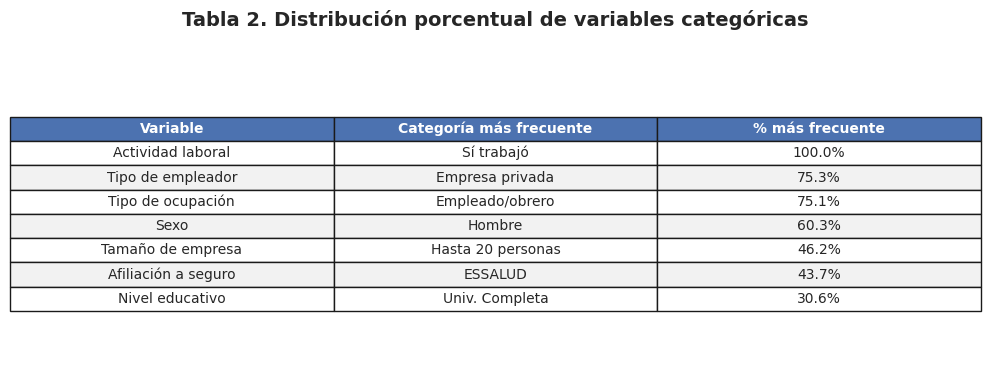

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# === Diccionario de nombres legibles ===
nombres_categoricas = {
    'sexo': 'Sexo',
    'educacion': 'Nivel educativo',
    'activo': 'Actividad laboral',
    'ocupacion': 'Tipo de ocupación',
    'empleador': 'Tipo de empleador',
    'tamano_empresa': 'Tamaño de empresa',
    'seguro': 'Afiliación a seguro'
}

# === Construcción de tabla ===
tabla2_data = []

for col in nombres_categoricas:
    if col in df_eda.columns and df_eda[col].notna().sum() > 0:
        # Moda y porcentaje
        valor_mas_frec = df_eda[col].mode().iloc[0]
        porcentaje = df_eda[col].value_counts(normalize=True).iloc[0] * 100
        tabla2_data.append([
            nombres_categoricas[col],
            str(valor_mas_frec),
            f"{porcentaje:.1f}%"
        ])
    else:
        tabla2_data.append([
            nombres_categoricas[col],
            'No disponible',
            '—'
        ])

# Crear DataFrame
tabla2 = pd.DataFrame(tabla2_data, columns=['Variable', 'Categoría más frecuente', '% más frecuente'])

# Ordenar por porcentaje (si es posible)
tabla2['orden'] = tabla2['% más frecuente'].apply(lambda x: float(x.replace('%','')) if x != '—' else 0)
tabla2 = tabla2.sort_values(by='orden', ascending=False).drop(columns='orden')

# === Mostrar tabla como imagen ===
def mostrar_tabla_como_imagen(df, titulo="Tabla", figsize=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # Crear tabla visual
    tabla = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     cellLoc='center',
                     loc='center')

    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.4)

    # Colores alternados
    for (i, j), cell in tabla.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#4C72B0')  # azul encabezado
        elif i % 2 == 0:
            cell.set_facecolor('#F2F2F2')
        else:
            cell.set_facecolor('#FFFFFF')

    ax.set_title(titulo, fontsize=14, pad=20, weight='bold')
    plt.tight_layout()
    plt.show()

mostrar_tabla_como_imagen(tabla2, "Tabla 2. Distribución porcentual de variables categóricas")


### Graficos exploratorio

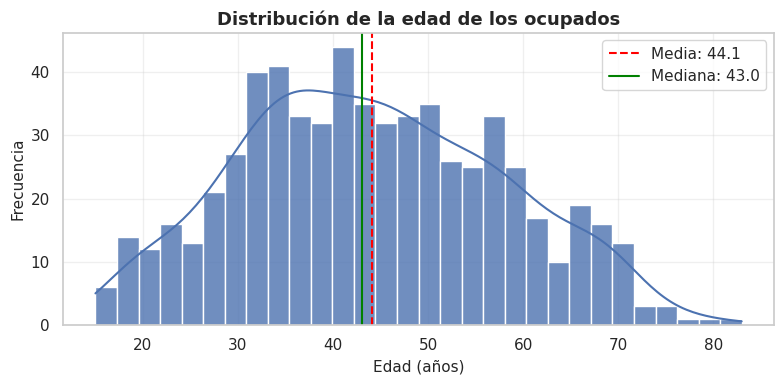

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Histograma con suavizado KDE
sns.histplot(
    data=df_eda,
    x='C208',
    bins=30,
    kde=True,
    color='#4C72B0',  # tono azul profesional
    edgecolor='white',
    alpha=0.8
)

# Líneas de resumen (media y mediana)
media = df_eda['C208'].mean()
mediana = df_eda['C208'].median()
plt.axvline(media, color='red', linestyle='--', linewidth=1.5, label=f'Media: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=1.5, label=f'Mediana: {mediana:.1f}')

# Títulos y estilo
plt.title('Distribución de la edad de los ocupados', fontsize=13, weight='bold')
plt.xlabel('Edad (años)', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


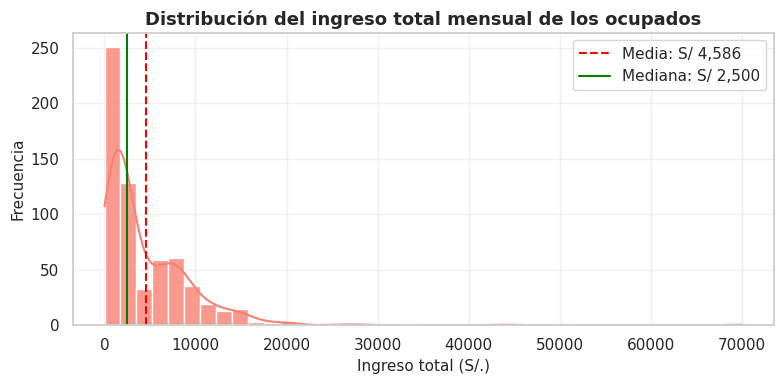

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Histograma del ingreso total (limitando eje para evitar sesgos por outliers)
sns.histplot(
    data=df_eda,
    x='INGTOT',
    bins=40,
    kde=True,
    color='salmon',
    edgecolor='white',
    alpha=0.8
)

# Calcular media y mediana
media = df_eda['INGTOT'].mean()
mediana = df_eda['INGTOT'].median()

# Añadir líneas de referencia
plt.axvline(media, color='red', linestyle='--', linewidth=1.5, label=f'Media: S/ {media:,.0f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=1.5, label=f'Mediana: S/ {mediana:,.0f}')

# Títulos y estilo
plt.title('Distribución del ingreso total mensual de los ocupados', fontsize=13, weight='bold')
plt.xlabel('Ingreso total (S/.)', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-240126848.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




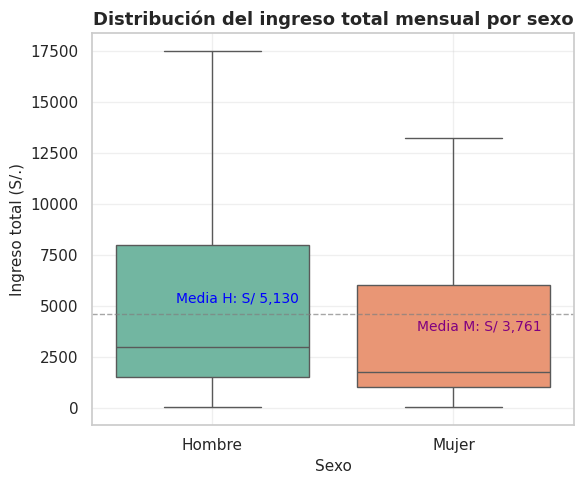

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))

sns.boxplot(
    x='sexo',
    y='INGTOT',
    data=df_eda,
    palette='Set2',
    showfliers=False  # oculta valores extremos para visualizar mejor la mediana
)

# Calcular estadísticas resumen
media_h = df_eda[df_eda['sexo'] == 'Hombre']['INGTOT'].mean()
media_m = df_eda[df_eda['sexo'] == 'Mujer']['INGTOT'].mean()
mediana_h = df_eda[df_eda['sexo'] == 'Hombre']['INGTOT'].median()
mediana_m = df_eda[df_eda['sexo'] == 'Mujer']['INGTOT'].median()

# Añadir líneas horizontales de promedio general
plt.axhline(df_eda['INGTOT'].mean(), color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Título y etiquetas
plt.title('Distribución del ingreso total mensual por sexo', fontsize=13, weight='bold')
plt.xlabel('Sexo', fontsize=11)
plt.ylabel('Ingreso total (S/.)', fontsize=11)

# Mostrar valores medios y medianas en texto
plt.text(-0.15, media_h, f"Media H: S/ {media_h:,.0f}", color='blue', fontsize=10)
plt.text(0.85, media_m, f"Media M: S/ {media_m:,.0f}", color='purple', fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


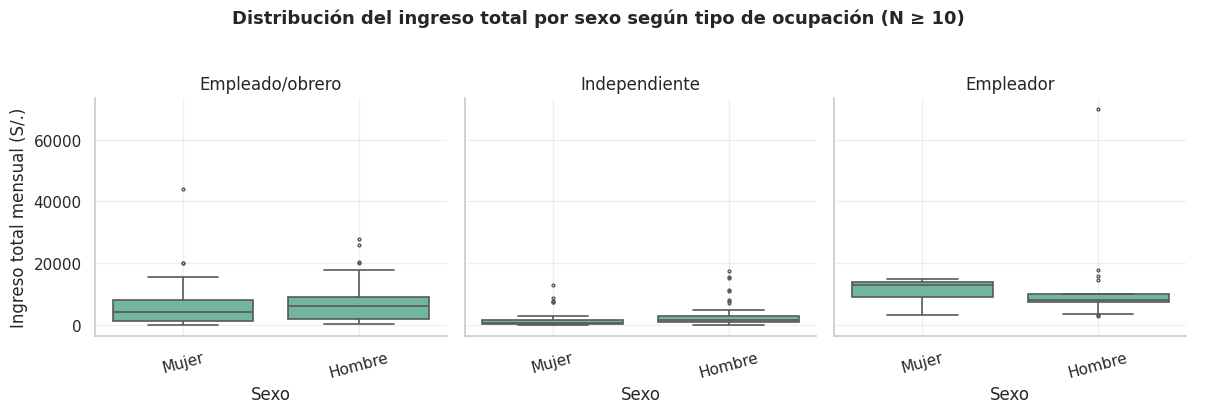

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar ocupaciones con al menos 10 observaciones
counts = df_eda['ocupacion'].value_counts()
ocupaciones_validas = counts[counts >= 10].index

df_sub = df_eda[df_eda['ocupacion'].isin(ocupaciones_validas)].copy()

# Crear el gráfico con estilo y colores personalizados
sns.set(style="whitegrid", palette="Set2")

g = sns.catplot(
    data=df_sub,
    x='sexo',
    y='INGTOT',
    col='ocupacion',
    kind='box',
    col_wrap=3,
    sharey=True,
    height=4,
    aspect=1,
    fliersize=2,           # reduce tamaño de outliers
    linewidth=1.2
)

# Ajustes visuales
g.set_axis_labels("Sexo", "Ingreso total mensual (S/.)")
g.set_titles(col_template="{col_name}")
g.fig.suptitle(
    "Distribución del ingreso total por sexo según tipo de ocupación (N ≥ 10)",
    fontsize=13, weight='bold', y=1.03
)

# Rotar etiquetas del eje X y aplicar grid suave
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=15)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
g.set(yscale='log')



/tmp/ipython-input-930165659.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




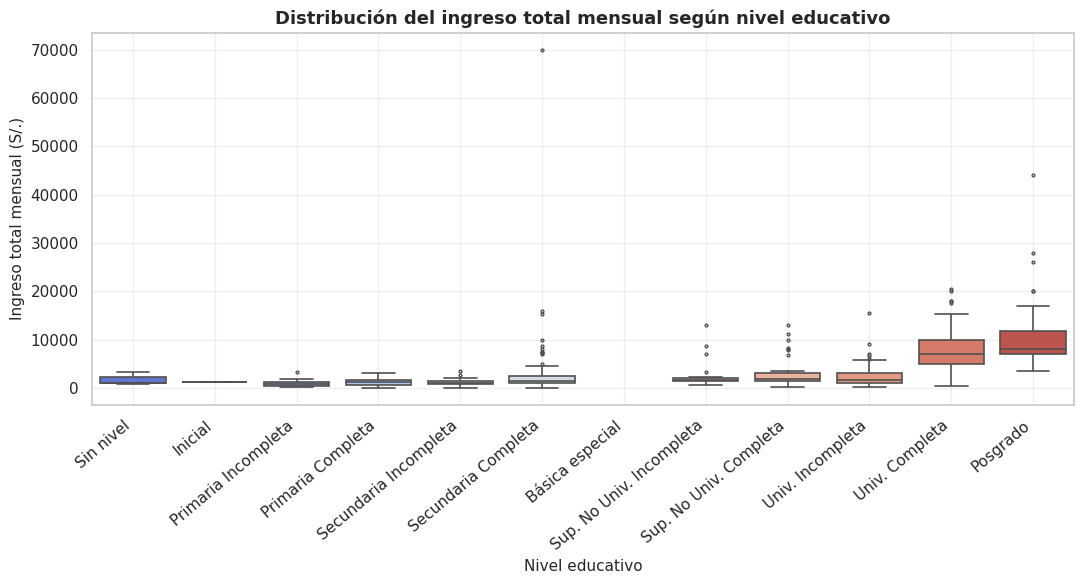

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Orden lógico de niveles educativos
orden_educacion = [
    'Sin nivel', 'Inicial', 'Primaria Incompleta', 'Primaria Completa',
    'Secundaria Incompleta', 'Secundaria Completa', 'Básica especial',
    'Sup. No Univ. Incompleta', 'Sup. No Univ. Completa',
    'Univ. Incompleta', 'Univ. Completa', 'Posgrado'
]

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(11, 6))
sns.boxplot(
    x='educacion',
    y='INGTOT',
    data=df_eda,
    order=orden_educacion,
    palette='coolwarm',
    fliersize=2,
    linewidth=1.2
)

plt.title('Distribución del ingreso total mensual según nivel educativo', fontsize=13, weight='bold')
plt.xticks(rotation=40, ha='right')
plt.xlabel('Nivel educativo', fontsize=11)
plt.ylabel('Ingreso total mensual (S/.)', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1225551953.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




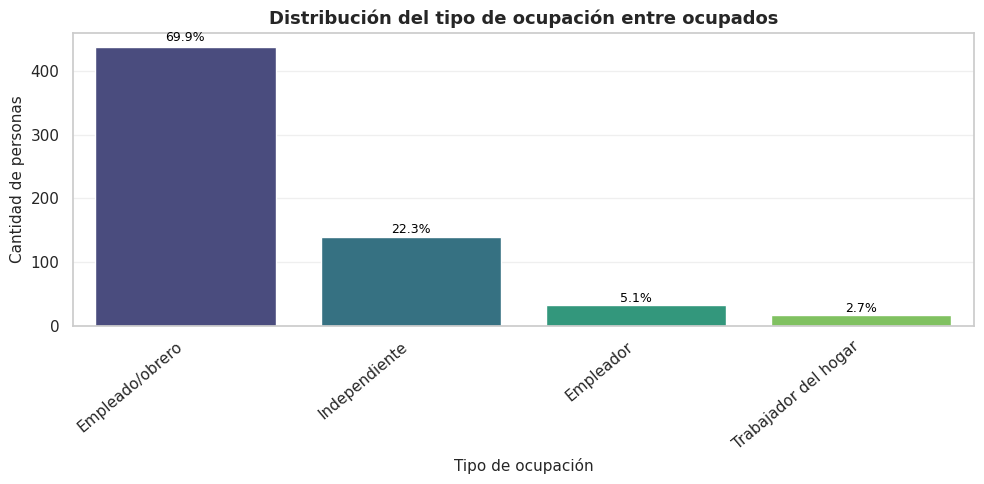

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# =============================
# 1. Asegurar tipo numérico
# =============================
df_eda['C310'] = pd.to_numeric(df_eda['C310'], errors='coerce')

# =============================
# 2. Mapear nombres legibles
# =============================
ocupacion_map = {
    1: 'Empleador',
    2: 'Independiente',
    3: 'Empleado/obrero',
    4: 'Ayudante familiar',
    5: 'Ayudante empleo familiar',
    6: 'Trabajador del hogar',
    7: 'Practicante remunerado',
    8: 'Practicante no remunerado',
    9: 'Ayudante otro hogar',
    10: 'Ayudante empleo otro hogar'
}
df_eda['ocupacion'] = df_eda['C310'].map(ocupacion_map).fillna('No especificado')

# =============================
# 3. Ordenar por frecuencia
# =============================
ocupacion_order = df_eda['ocupacion'].value_counts().index

# =============================
# 4. Calcular proporciones (%)
# =============================
ocupacion_pct = (
    df_eda['ocupacion'].value_counts(normalize=True) * 100
).round(1)

# =============================
# 5. Graficar
# =============================
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    data=df_eda,
    x='ocupacion',
    order=ocupacion_order,
    palette='viridis'
)

# Agregar etiquetas con %
for i, label in enumerate(ocupacion_order):
    count = df_eda['ocupacion'].value_counts()[label]
    pct = ocupacion_pct[label]
    ax.text(i, count + (count * 0.01), f"{pct:.1f}%", ha='center', va='bottom', fontsize=9, color='black')

# Personalización estética
plt.title('Distribución del tipo de ocupación entre ocupados', fontsize=13, weight='bold')
plt.xlabel('Tipo de ocupación', fontsize=11)
plt.ylabel('Cantidad de personas', fontsize=11)
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
from scipy.stats import mannwhitneyu

# ==========================
# 1. Filtrar ocupaciones con al menos 10 registros
# ==========================
conteo_ocupaciones = df_eda['ocupacion'].value_counts()
ocupaciones_validas = conteo_ocupaciones[conteo_ocupaciones >= 10].index.tolist()

# Subconjunto del DataFrame
df_sub = df_eda[df_eda['ocupacion'].isin(ocupaciones_validas)].copy()

# ==========================
# 2. Función de análisis
# ==========================
def analizar_ingresos_por_ocupacion(df, ocupaciones_validas):
    resultados = []

    for ocupacion in ocupaciones_validas:
        grupo = df[df['ocupacion'] == ocupacion]
        hombres = grupo[grupo['sexo'] == 'Hombre']['INGTOT'].dropna()
        mujeres = grupo[grupo['sexo'] == 'Mujer']['INGTOT'].dropna()

        # Medianas
        med_h = hombres.median()
        med_m = mujeres.median()

        # Prueba estadística
        if len(hombres) >= 5 and len(mujeres) >= 5:
            _, p_valor = mannwhitneyu(hombres, mujeres, alternative='two-sided')
        else:
            p_valor = None

        resultados.append({
            'Ocupación': ocupacion,
            'Hombres (n)': len(hombres),
            'Mujeres (n)': len(mujeres),
            'Mediana hombres': med_h,
            'Mediana mujeres': med_m,
            'Diferencia (H-M)': med_h - med_m,
            'p-valor': p_valor
        })

    # Convertir a DataFrame
    df_result = pd.DataFrame(resultados)
    df_result['Significativo'] = df_result['p-valor'].apply(
        lambda p: 'Sí (p<0.05)' if p is not None and p < 0.05 else 'No'
    )

    # Formato y orden
    df_result['p-valor'] = df_result['p-valor'].apply(lambda x: f"{x:.4f}" if pd.notnull(x) else '-')
    df_result = df_result.sort_values(by='Diferencia (H-M)', ascending=False).reset_index(drop=True)

    return df_result

# ==========================
# 3. Ejecución
# ==========================
resumen_df = analizar_ingresos_por_ocupacion(df_sub, ocupaciones_validas)

# ==========================
# 4. Mostrar resultados
# ==========================
print("=== Comparación de ingresos entre hombres y mujeres por ocupación ===")
display(resumen_df)


=== Comparación de ingresos entre hombres y mujeres por ocupación ===


,Ocupación,Hombres (n),Mujeres (n),Mediana hombres,Mediana mujeres,Diferencia (H-M),p-valor,Significativo
0,Empleado/obrero,268,170,3625.0,2704.5,920.5,0.0042,Sí (p<0.05)
1,Independiente,84,56,1518.0,751.5,766.5,0.0000,Sí (p<0.05)
2,Empleador,25,7,8000.0,9000.0,-1000.0,0.8728,No
3,Trabajador del hogar,1,16,303.0,1385.0,-1082.0,-,No


In [74]:
# Visualizar distribución original de C377
print("Distribución original de C377:")
display(df_eda['C377'].value_counts(dropna=False))

# Crear variable categórica de etnia
etnia_map = {
    1: 'Quechua',
    2: 'Aymara',
    3: 'Nativo',
    4: 'Originario',
    5: 'Afrodescendiente',
    6: 'Blanco',
    7: 'Mestizo',
    8: 'Otro',
    9: 'No sabe'
}

df_eda['etnia'] = df_eda['C377'].map(etnia_map)

# Mostrar valores no mapeados (si existen)
no_mapeados = df_eda.loc[~df_eda['C377'].isin(etnia_map.keys()), 'C377'].unique()
if len(no_mapeados) > 0:
    print(" Códigos no mapeados encontrados:", no_mapeados)
else:
    print(" Todos los códigos de C377 fueron mapeados correctamente.")

# Visualizar conteo de categorías ya mapeadas
print("\nDistribución de la variable 'etnia':")
display(df_eda['etnia'].value_counts(dropna=False))


Distribución original de C377:


,count
C377,
7.0,413
7,69
1.0,46
6.0,34
9.0,17
5.0,12
1,11
8.0,8
9,8


 Códigos no mapeados encontrados: ['7' '9' '1' '8' '6']

Distribución de la variable 'etnia':


,count
etnia,
Mestizo,413
NaN,91
Quechua,46
Blanco,34
No sabe,17
Afrodescendiente,12
Otro,8
Aymara,4
Nativo,1


 Tabla cruzada sexo × ocupación (conteos):


ocupacion,Empleado/obrero,Empleador,Independiente,Trabajador del hogar
sexo,,,,
Mujer,170,7,56,16
Hombre,268,25,84,1



 Diagnóstico rápido:
Dtypes por columna: {'Empleado/obrero': dtype('int64'), 'Empleador': dtype('int64'), 'Independiente': dtype('int64'), 'Trabajador del hogar': dtype('int64')}
Columnas disponibles: ['Empleado/obrero', 'Empleador', 'Independiente', 'Trabajador del hogar']
Índices disponibles: ['Mujer', 'Hombre']

Total de observaciones a graficar: 627


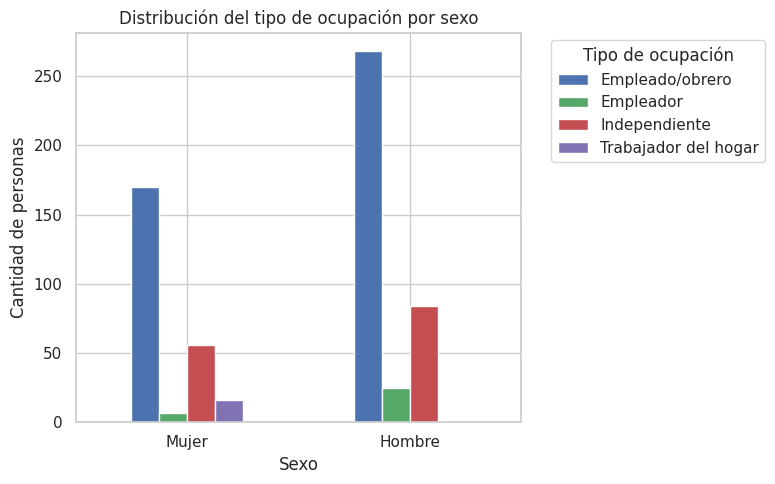

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# ==========================
# TABLA CRUZADA SEXO × OCUPACIÓN
# ==========================
# Construir crosstab con orden de índices
ct = pd.crosstab(df_eda['sexo'], df_eda['ocupacion']).reindex(
    index=['Mujer', 'Hombre'], fill_value=0
)

print(" Tabla cruzada sexo × ocupación (conteos):")
display(ct)

# ==========================
# VERIFICACIONES
# ==========================
print("\n Diagnóstico rápido:")
print(f"Dtypes por columna: {ct.dtypes.to_dict()}")
print(f"Columnas disponibles: {ct.columns.tolist()}")
print(f"Índices disponibles: {ct.index.tolist()}")

# Columnas que queremos analizar
categorias_objetivo = ['Empleado/obrero', 'Empleador', 'Independiente', 'Trabajador del hogar']
categorias_presentes = [c for c in categorias_objetivo if c in ct.columns]

if not categorias_presentes:
    print(f"\n Ninguna de las categorías {categorias_objetivo} está presente.")
    print("Usa alguna de las columnas disponibles:", ct.columns.tolist())
else:
    # ==========================
    # CONVERSIÓN SEGURA A NUMÉRICO
    # ==========================
    ct_num = (
        ct[categorias_presentes]
        .apply(lambda col: pd.to_numeric(col.astype(str).str.replace(',', '').str.strip(), errors='coerce'))
        .fillna(0)
    )

    # Convertir a enteros si no hay NaN
    if ct_num.notna().all().all():
        ct_num = ct_num.astype(int)
    else:
        print("\n Algunos valores no se pudieron convertir a número:")
        print(ct_num[ct_num.isna().any(axis=1)])

    # ==========================
    # GRÁFICO
    # ==========================
    total = ct_num.sum().sum()
    print(f"\nTotal de observaciones a graficar: {total:,}")

    if total == 0:
        print(" No hay datos válidos para graficar. Revisa tus categorías.")
    else:
        ax = ct_num.plot(kind='bar', figsize=(8, 5), color=['#4C72B0', '#55A868', '#C44E52', '#8172B3'])
        ax.set_title('Distribución del tipo de ocupación por sexo')
        ax.set_xlabel('Sexo')
        ax.set_ylabel('Cantidad de personas')
        ax.legend(title='Tipo de ocupación', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


 Tabla cruzada generada:
etnia                 Afrodescendiente  Aymara  Blanco  Mestizo  Nativo  \
ocupacion                                                                 
Empleado/obrero                     11       2      27      306       0   
Empleador                            0       0       2       23       1   
Independiente                        1       2       3       79       0   
Trabajador del hogar                 0       0       2        5       0   

etnia                 No sabe  Originario  Otro  Quechua  
ocupacion                                                 
Empleado/obrero            13           1     6       19  
Empleador                   0           0     2        2  
Independiente               4           0     0       20  
Trabajador del hogar        0           0     0        5  

Columnas disponibles: ['Afrodescendiente', 'Aymara', 'Blanco', 'Mestizo', 'Nativo', 'No sabe', 'Originario', 'Otro', 'Quechua']
Filas disponibles: ['Empleado/obrero', 'E

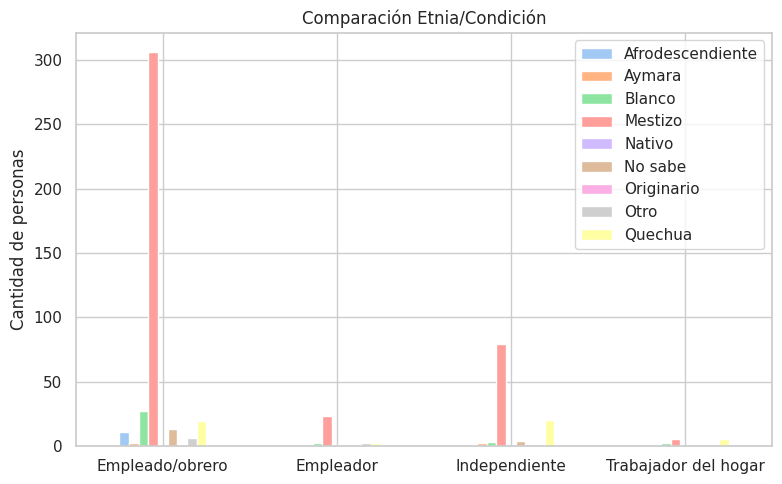

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

def generar_crosstab(df, fila, columna, orden_filas=None, columnas_interes=None):
    """
    Genera una tabla cruzada (crosstab) y la prepara para graficar.

    Args:
        df (pd.DataFrame): DataFrame original.
        fila (str): Nombre de la columna para las filas.
        columna (str): Nombre de la columna para las columnas.
        orden_filas (list): Orden deseado de las filas.
        columnas_interes (list): Columnas a graficar (categorías específicas).

    Returns:
        pd.DataFrame: Tabla cruzada procesada.
    """
    # Crear tabla cruzada con totales faltantes reemplazados por 0
    crosstab = pd.crosstab(df[fila], df[columna])
    if orden_filas:
        crosstab = crosstab.reindex(index=orden_filas, fill_value=0)
    else:
        crosstab = crosstab.fillna(0)

    print(" Tabla cruzada generada:")
    print(crosstab)
    print("\nColumnas disponibles:", list(crosstab.columns))
    print("Filas disponibles:", list(crosstab.index))

    # Filtrar solo las columnas deseadas si existen
    if columnas_interes:
        columnas_presentes = [col for col in columnas_interes if col in crosstab.columns]
        if not columnas_presentes:
            print(f"\n Ninguna de las columnas {columnas_interes} está en la tabla.")
            print("Usa alguna de las columnas disponibles:", list(crosstab.columns))
            return pd.DataFrame()
        crosstab = crosstab[columnas_presentes]

    # Convertir todo a valores numéricos seguros
    crosstab = (
        crosstab
        .apply(lambda s: pd.to_numeric(s.astype(str).str.replace(',', '').str.strip(), errors='coerce'))
        .fillna(0)
    )

    return crosstab.astype(int)


def graficar_crosstab(ct, titulo="Comparación Etnia/Condición", ylabel="Cantidad de personas"):
    """
    Grafica una tabla cruzada (bar chart).

    Args:
        ct (pd.DataFrame): Tabla cruzada lista para graficar.
        titulo (str): Título del gráfico.
        ylabel (str): Etiqueta del eje Y.
    """
    if ct.empty:
        print(" No hay datos válidos para graficar.")
        return

    total_valores = ct.to_numpy().sum()
    if total_valores <= 0:
        print(" No hay valores positivos para graficar.")
        return

    ax = ct.plot(kind='bar', figsize=(8, 5))
    ax.set_title(titulo)
    ax.set_xlabel('')
    ax.set_ylabel(ylabel)
    ax.legend(title='')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# ============================
# USO DEL SCRIPT
# ============================

orden_ocupacion = ['Empleado/obrero', 'Empleador', 'Independiente', 'Trabajador del hogar']
etnias_interes = ['Afrodescendiente', 'Aymara', 'Blanco', 'Mestizo', 'Nativo', 'No sabe', 'Originario', 'Otro', 'Quechua']

# Generar crosstab
ct_final = generar_crosstab(
    df=df_eda,
    fila='ocupacion',
    columna='etnia',
    orden_filas=orden_ocupacion,
    columnas_interes=etnias_interes
)

# Graficar resultado
graficar_crosstab(ct_final)


 CROSSTAB (raw):
educacion             Inicial  Posgrado  Primaria Completa  \
ocupacion                                                    
Empleado/obrero             0        68                  7   
Empleador                   0         1                  0   
Independiente               1         5                  6   
Trabajador del hogar        0         0                  0   

educacion             Primaria Incompleta  Secundaria Completa  \
ocupacion                                                        
Empleado/obrero                         5                   74   
Empleador                               0                    9   
Independiente                           4                   46   
Trabajador del hogar                    2                    4   

educacion             Secundaria Incompleta  Sin nivel  \
ocupacion                                                
Empleado/obrero                          17          2   
Empleador                              

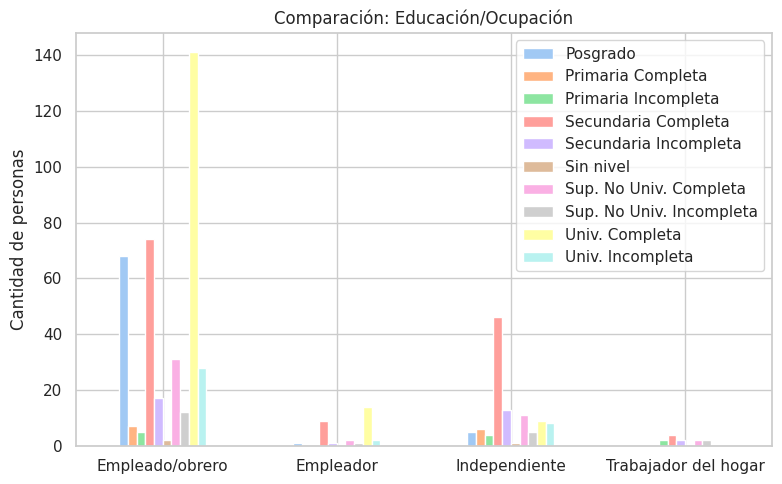

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

def generar_crosstab(df, fila, columna, orden_filas=None, columnas_interes=None):
    """
    Genera una tabla cruzada entre dos variables y la limpia para graficar.

    Args:
        df (pd.DataFrame): DataFrame fuente.
        fila (str): Columna usada como índice (filas).
        columna (str): Columna usada como columnas.
        orden_filas (list, opcional): Orden específico para las filas.
        columnas_interes (list, opcional): Lista de columnas a mantener.

    Returns:
        pd.DataFrame: Crosstab limpio y listo para graficar.
    """
    # Crear la tabla cruzada
    tabla = pd.crosstab(df[fila], df[columna])

    # Reordenar filas si se especifica un orden
    if orden_filas:
        tabla = tabla.reindex(index=orden_filas, fill_value=0)
    else:
        tabla = tabla.fillna(0)

    # Diagnóstico rápido
    print(" CROSSTAB (raw):")
    print(tabla)
    print("\n Dtypes por columna:", tabla.dtypes.to_dict())
    print(" Columnas disponibles:", tabla.columns.tolist())
    print(" Filas disponibles:", tabla.index.tolist())

    # Filtrar columnas deseadas
    if columnas_interes:
        disponibles = [c for c in columnas_interes if c in tabla.columns]
        if not disponibles:
            print(f"\n⚠️ Ninguna de las columnas buscadas está en la tabla:")
            print(columnas_interes)
            print("\nUsa alguna de las disponibles:", tabla.columns.tolist())
            return pd.DataFrame()
        tabla = tabla[disponibles]

    # Convertir valores a numéricos seguros
    tabla = (
        tabla.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(',', '').str.strip(), errors='coerce'))
        .fillna(0)
        .astype(int)
    )

    return tabla


def graficar_crosstab(ct, titulo="Comparación: Educación/Ocupación", ylabel="Cantidad de personas", figsize=(8,5)):
    """
    Grafica una tabla cruzada como gráfico de barras.

    Args:
        ct (pd.DataFrame): Tabla cruzada numérica.
        titulo (str): Título del gráfico.
        ylabel (str): Etiqueta del eje Y.
        figsize (tuple): Tamaño del gráfico.
    """
    if ct.empty:
        print(" No hay datos válidos para graficar.")
        return

    total = ct.to_numpy().sum()
    print("\n Suma total de valores a graficar:", total)

    if total <= 0:
        print("No hay datos positivos para graficar.")
        return

    ax = ct.plot(kind='bar', figsize=figsize)
    ax.set_title(titulo)
    ax.set_xlabel('')
    ax.set_ylabel(ylabel)
    ax.legend(title='')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# ==================================
# USO DEL SCRIPT
# ==================================
orden_ocupacion = ['Empleado/obrero', 'Empleador', 'Independiente', 'Trabajador del hogar']
niveles_educacion = [
    'Posgrado', 'Primaria Completa', 'Primaria Incompleta',
    'Secundaria Completa', 'Secundaria Incompleta', 'Sin nivel',
    'Sup. No Univ. Completa', 'Sup. No Univ. Incompleta',
    'Univ. Completa', 'Univ. Incompleta'
]

# Generar crosstab limpio
ct_educacion = generar_crosstab(
    df=df_eda,
    fila='ocupacion',
    columna='educacion',
    orden_filas=orden_ocupacion,
    columnas_interes=niveles_educacion
)

# Graficar resultados
graficar_crosstab(ct_educacion)


DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

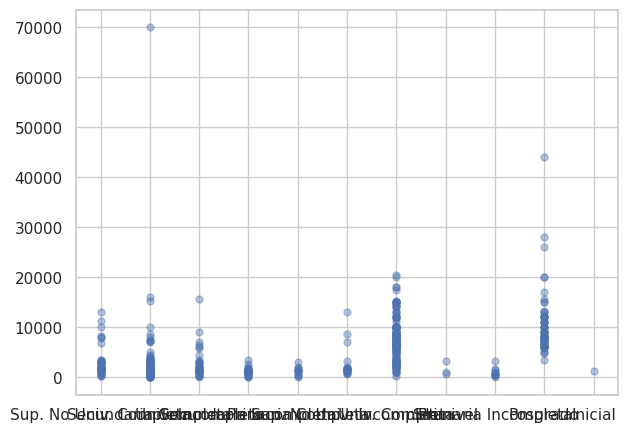

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def graficar_regresion(df, x, y, titulo, xlabel, ylabel, figsize=(7, 5)):
    """
    Genera un gráfico de dispersión con línea de regresión y suavizado LOWESS.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        x (str): Nombre de la variable independiente.
        y (str): Nombre de la variable dependiente.
        titulo (str): Título del gráfico.
        xlabel (str): Etiqueta del eje X.
        ylabel (str): Etiqueta del eje Y.
        figsize (tuple): Tamaño de la figura.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    sns.regplot(
        data=df, x=x, y=y,
        scatter_kws={'alpha': 0.4, 's': 25},
        line_kws={'color': 'red'},
        lowess=True
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.tight_layout()
    plt.show()


def calcular_correlaciones(df, var_x, var_y):
    """
    Calcula y muestra las correlaciones de Pearson y Spearman entre dos variables.

    Args:
        df (pd.DataFrame): DataFrame con las variables.
        var_x (str): Nombre de la primera variable.
        var_y (str): Nombre de la segunda variable.
    """
    pearson = df[[var_x, var_y]].corr(method='pearson').iloc[0, 1]
    spearman = df[[var_x, var_y]].corr(method='spearman').iloc[0, 1]

    print(f"Correlación Pearson: {pearson:.2f}")
    print(f"Correlación Spearman: {spearman:.2f}")


# =============================
# USO DEL SCRIPT
# =============================
graficar_regresion(
    df=df_eda,
    x='educacion',
    y='INGTOT',
    titulo='Relación nivel educativo - ingreso',
    xlabel='Nivel educativo (ordinal)',
    ylabel='Ingreso total (S/.)'
)

calcular_correlaciones(df_eda, 'educacion', 'INGTOT')


### valores inucuales

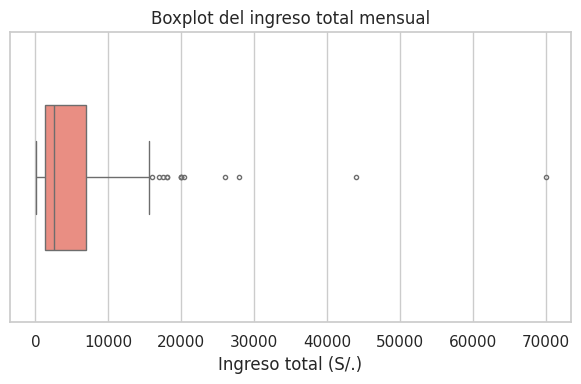

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def graficar_boxplot(df, columna, titulo, xlabel, color='salmon', figsize=(6, 4)):
    """
    Genera un boxplot para visualizar la distribución de una variable numérica.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna (str): Nombre de la variable numérica a graficar.
        titulo (str): Título del gráfico.
        xlabel (str): Etiqueta del eje X.
        color (str): Color del boxplot.
        figsize (tuple): Tamaño del gráfico.
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=df[columna], ax=ax, color=color, width=0.5, fliersize=3)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()


# =============================
# USO DEL SCRIPT
# =============================
graficar_boxplot(
    df=df_eda,
    columna='INGTOT',
    titulo='Boxplot del ingreso total mensual',
    xlabel='Ingreso total (S/.)',
    color='salmon'
)


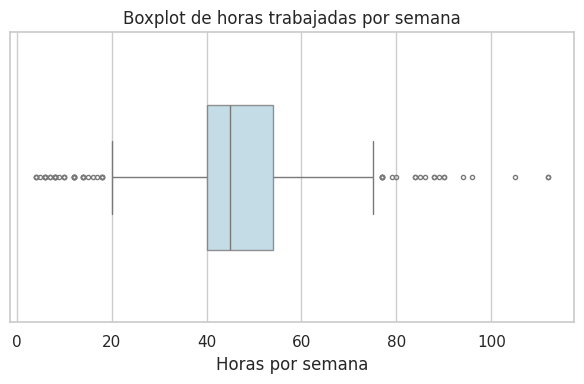

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def graficar_boxplot(df, columna, titulo, xlabel, color='lightblue', figsize=(6, 4)):
    """
    Genera un boxplot para visualizar la distribución de una variable numérica.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna (str): Nombre de la variable numérica a graficar.
        titulo (str): Título del gráfico.
        xlabel (str): Etiqueta del eje X.
        color (str): Color del boxplot.
        figsize (tuple): Tamaño del gráfico.
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(
        x=df[columna],
        ax=ax,
        color=color,
        width=0.5,
        fliersize=3,
        boxprops={'alpha': 0.8}
    )
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()


# =============================
# USO DEL SCRIPT
# =============================
graficar_boxplot(
    df=df_eda,
    columna='whoraT',
    titulo='Boxplot de horas trabajadas por semana',
    xlabel='Horas por semana',
    color='lightblue'
)


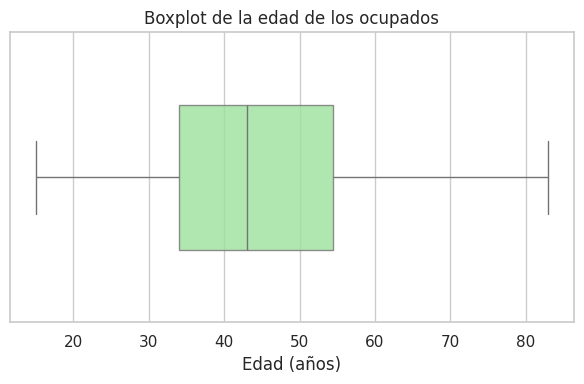

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def graficar_boxplot(df, columna, titulo, xlabel, color='lightgreen', figsize=(6, 4)):
    """
    Genera un boxplot para visualizar la distribución de una variable numérica.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna (str): Nombre de la variable numérica a graficar.
        titulo (str): Título del gráfico.
        xlabel (str): Etiqueta del eje X.
        color (str): Color del boxplot.
        figsize (tuple): Tamaño de la figura.
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(
        x=df[columna],
        ax=ax,
        color=color,
        width=0.5,
        fliersize=3,
        boxprops={'alpha': 0.8}
    )
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()


# =============================
# USO DEL SCRIPT
# =============================
graficar_boxplot(
    df=df_eda,
    columna='C208',
    titulo='Boxplot de la edad de los ocupados',
    xlabel='Edad (años)',
    color='lightgreen'
)


In [83]:
import pandas as pd

def filtrar_personas_mayores(df, columna_edad='C208', edad_minima=80, columnas_mostrar=None, n=5):
    """
    Filtra y muestra las personas con edad mayor a un umbral dado.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        columna_edad (str): Nombre de la columna que contiene la edad.
        edad_minima (int): Umbral mínimo de edad.
        columnas_mostrar (list): Columnas a mostrar en el resultado.
        n (int): Número de filas a mostrar con display().

    Returns:
        pd.DataFrame: Subconjunto del DataFrame filtrado.
    """
    if columnas_mostrar is None:
        columnas_mostrar = [columna_edad]

    # Filtrar mayores a la edad mínima
    df_filtrado = df[df[columna_edad] > edad_minima][columnas_mostrar]

    print(f"Total de personas mayores de {edad_minima}: {len(df_filtrado)}")
    display(df_filtrado.head(n))

    return df_filtrado


# =============================
# USO DEL SCRIPT
# =============================
casos_mayores = filtrar_personas_mayores(
    df=df_eda,
    columna_edad='C208',
    edad_minima=80,
    columnas_mostrar=['C208', 'sexo', 'ocupacion'],
    n=5
)


Total de personas mayores de 80: 1


,C208,sexo,ocupacion
182,83.0,Mujer,Independiente


In [84]:
# --- Análisis de casos atípicos en los ocupados ---

# 1️ Personas que trabajan pero reportan ingreso = 0
casos_ingreso_cero = df_eda.query('INGTOT == 0')[['C208', 'sexo', 'whoraT', 'ocupacion']]

# 2️Personas que declaran más de 100 horas trabajadas por semana
casos_muchas_horas = df_eda.query('whoraT > 100')[['C208', 'sexo', 'whoraT', 'ocupacion']]

# 3️ Unimos ambos conjuntos para revisión general (manteniendo etiquetas de origen)
casos_ingreso_cero['tipo_anomalia'] = 'Ingreso = 0'
casos_muchas_horas['tipo_anomalia'] = 'Horas > 100'

casos_anomalos = pd.concat([casos_ingreso_cero, casos_muchas_horas], ignore_index=True)

# Mostramos los primeros casos combinados
display(casos_anomalos.head(10))

# 4️ Pequeño resumen estadístico de las anomalías encontradas
print("Resumen de casos atípicos:")
print(casos_anomalos['tipo_anomalia'].value_counts())


,C208,sexo,whoraT,ocupacion,tipo_anomalia
0,40.0,Mujer,105.0,Independiente,Horas > 100
1,65.0,Hombre,112.0,Independiente,Horas > 100
2,58.0,Hombre,112.0,Empleado/obrero,Horas > 100


Resumen de casos atípicos:
tipo_anomalia
Horas > 100    3
Name: count, dtype: int64


Resumen de posibles anomalías en el dataset:

• Ingreso = 0 : 0
• Horas > 100 : 3
• Edad > 80   : 1


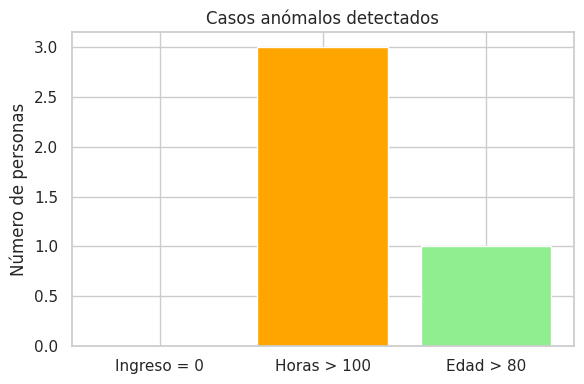

In [85]:
# --- Conteo general de posibles anomalías ---

anomalías = {
    "Ingreso = 0": (df_eda['INGTOT'] == 0).sum(),
    "Horas > 100": (df_eda['whoraT'] > 100).sum(),
    "Edad > 80": (df_eda['C208'] > 80).sum()
}

# Mostrar resultados
print("Resumen de posibles anomalías en el dataset:\n")
for tipo, cantidad in anomalías.items():
    print(f"• {tipo:<12}: {cantidad}")

# Si quieres mostrarlo visualmente:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(anomalías.keys(), anomalías.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Casos anómalos detectados')
plt.ylabel('Número de personas')
plt.tight_layout()
plt.show()


### Correlacion

Variables numéricas seleccionadas para análisis de correlación:
<class 'pandas.core.frame.DataFrame'>
Index: 627 entries, 3 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C208     627 non-null    float64
 1   whoraT   627 non-null    float64
 2   INGTOT   627 non-null    float64
 3   INGTOTP  627 non-null    float64
dtypes: float64(4)
memory usage: 24.5 KB
None


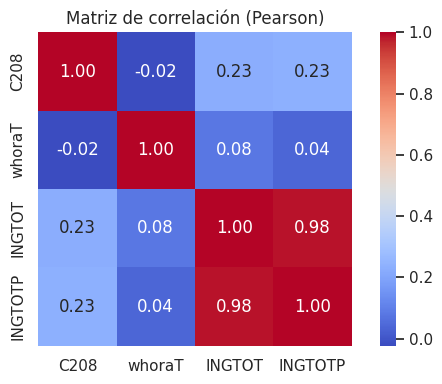

In [86]:
# Seleccionamos columnas numéricas relevantes si existen en el DataFrame
vars_interes = ['C208', 'whoraT', 'INGTOT', 'INGTOTP']
variables_corr = df_eda[vars_interes].select_dtypes(include='number')

print("Variables numéricas seleccionadas para análisis de correlación:")
print(variables_corr.info())

# --- Visualización de matriz de correlación ---
import seaborn as sns
import matplotlib.pyplot as plt

corr = variables_corr.corr(method='pearson')

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de correlación (Pearson)')
plt.tight_layout()
plt.show()

Matriz de correlación (Pearson):
          C208  whoraT  INGTOT  INGTOTP
C208     1.00   -0.02    0.23     0.23
whoraT  -0.02    1.00    0.08     0.04
INGTOT   0.23    0.08    1.00     0.98
INGTOTP  0.23    0.04    0.98     1.00 

Matriz de correlación (Spearman):
          C208  whoraT  INGTOT  INGTOTP
C208     1.00   -0.06    0.19     0.20
whoraT  -0.06    1.00    0.13     0.11
INGTOT   0.19    0.13    1.00     0.99
INGTOTP  0.20    0.11    0.99     1.00 



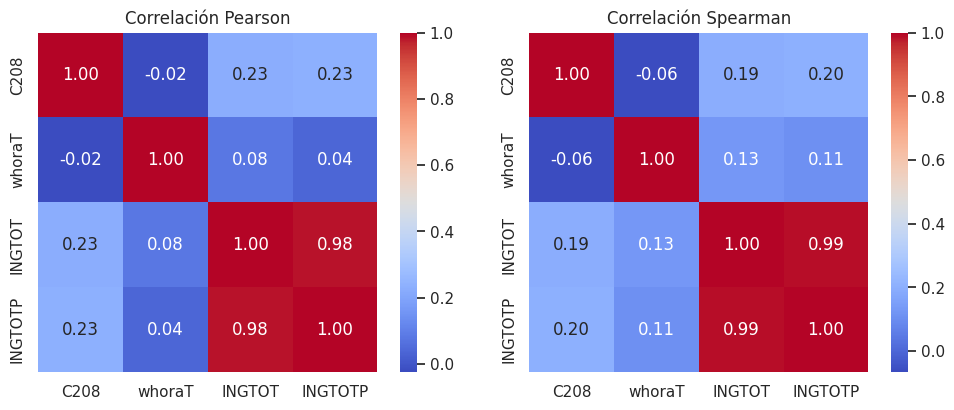

In [87]:
corr_pearson = variables_corr.corr(method='pearson')
corr_spearman = variables_corr.corr(method='spearman')

# Mostrar resumen de ambas matrices
print("Matriz de correlación (Pearson):\n", corr_pearson.round(2), "\n")
print("Matriz de correlación (Spearman):\n", corr_spearman.round(2), "\n")

# --- Visualización ---
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], square=True)
axes[0].set_title('Correlación Pearson')

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], square=True)
axes[1].set_title('Correlación Spearman')

plt.tight_layout()
plt.show()

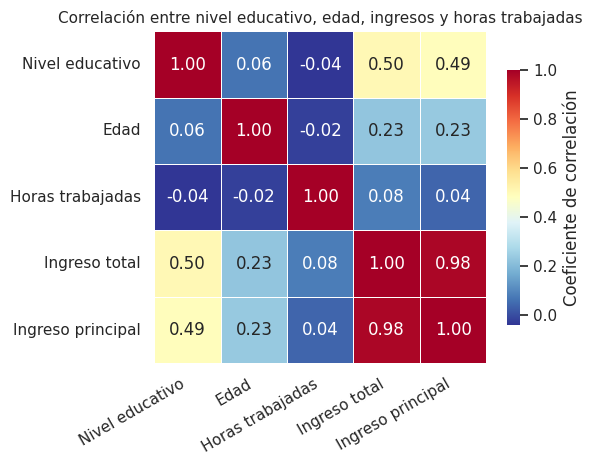

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Codificación ordinal del nivel educativo
niveles_educativos = {
    'Sin nivel': 0,
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Sup. No Univ. Incompleta': 5,
    'Sup. No Univ. Completa': 6,
    'Univ. Incompleta': 7,
    'Univ. Completa': 8,
    'Posgrado': 9
}

# Crear nueva columna ordinal solo si no existe
if 'nivel_edu_ordinal' not in df_eda.columns:
    df_eda['nivel_edu_ordinal'] = df_eda['educacion'].map(niveles_educativos)

# Selección de variables numéricas
variables_corr2 = df_eda[['nivel_edu_ordinal', 'C208', 'whoraT', 'INGTOT', 'INGTOTP']]

# Matriz de correlación (Pearson)
matriz_corr2 = variables_corr2.corr(method='pearson')

# Renombrar etiquetas para visualización
etiquetas = {
    'nivel_edu_ordinal': 'Nivel educativo',
    'C208': 'Edad',
    'whoraT': 'Horas trabajadas',
    'INGTOT': 'Ingreso total',
    'INGTOTP': 'Ingreso principal'
}
matriz_corr2 = matriz_corr2.rename(index=etiquetas, columns=etiquetas)

# --- Gráfico de correlación ---
plt.figure(figsize=(6, 5))
sns.heatmap(
    matriz_corr2,
    annot=True,
    fmt=".2f",
    cmap='RdYlBu_r',
    linewidths=0.6,
    square=True,
    cbar_kws={'shrink': 0.7, 'label': 'Coeficiente de correlación'}
)
plt.title('Correlación entre nivel educativo, edad, ingresos y horas trabajadas', fontsize=11)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Empleados

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo general
sns.set_theme(style="whitegrid")

# --- Limpieza y filtrado de población ocupada (15 años a más) ---

def limpiar_y_filtrar_ocupados(df):
    """
    Convierte columnas clave a numéricas, filtra personas mayores de 14 años
    que trabajaron la semana pasada, y muestra estadísticas básicas.
    """
    # Conversión a numérico con coerción de errores
    df = df.copy()
    columnas_numericas = ['C208', 'C303']
    df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

    # Filtro: edad válida (15–98) y trabajó la semana pasada
    filtrado = df.query("15 <= C208 <= 98 and C303 == 1").copy()

    # Reporte general
    print(f"Número total de personas mayores de 14 que trabajaron: {filtrado.shape[0]}")
    print("\nEstadísticas básicas de la edad:")
    print(filtrado['C208'].describe().round(2))

    return filtrado

# --- Uso de la función ---
trabajadores_mayores14 = limpiar_y_filtrar_ocupados(df_limpio)


Número total de personas mayores de 14 que trabajaron: 637

Estadísticas básicas de la edad:
count    637.00
mean      43.88
std       13.94
min       15.00
25%       34.00
50%       43.00
75%       54.00
max       83.00
Name: C208, dtype: float64


In [90]:
# --- Mapeo y resumen del tipo de ocupación ---

# Diccionario de categorías ocupacionales
mapa_c310 = {
    1: 'Empleador',
    2: 'Independiente',
    3: 'Empleado/Obrero',
    4: 'Ayudante familiar',
    5: 'Ayudante empleo familiar',
    6: 'Trabajador del hogar',
    7: 'Aprendiz remunerado',
    8: 'Practicante no remunerado',
    9: 'Ayudante otro hogar',
    10: 'Ayudante empleo otro hogar'
}

# Conversión y mapeo seguro
trabajadores_mayores14 = trabajadores_mayores14.copy()
trabajadores_mayores14['C310'] = pd.to_numeric(trabajadores_mayores14['C310'], errors='coerce')
trabajadores_mayores14['ocupacion'] = trabajadores_mayores14['C310'].map(mapa_c310).fillna('No responde')

# Generar tabla resumen ordenada
tabla_ocupacion = (
    trabajadores_mayores14['ocupacion']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Tipo de ocupación', 'ocupacion': 'Cantidad'})
    .sort_values('Cantidad', ascending=False)
)

# Mostrar resumen
print("Distribución por tipo de ocupación principal:")
print(tabla_ocupacion.to_string(index=False))


Distribución por tipo de ocupación principal:
                 Cantidad  count
     Trabajador del hogar     17
Practicante no remunerado      1
            Independiente    140
                Empleador     32
          Empleado/Obrero    438
        Ayudante familiar      9


/tmp/ipython-input-454465661.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




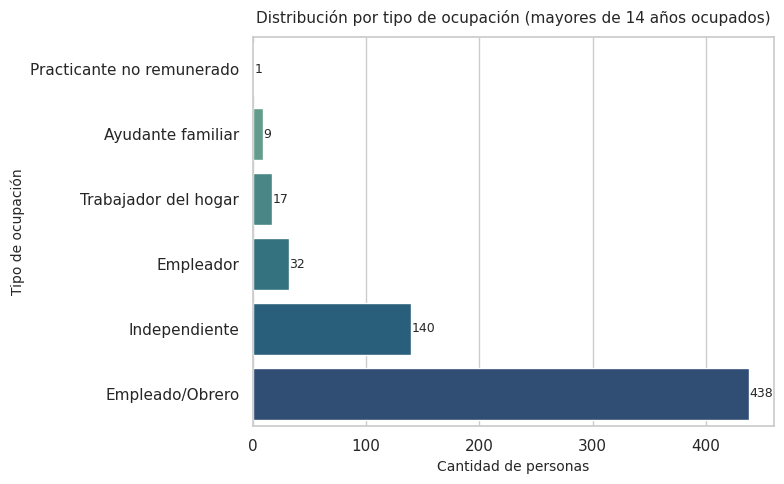

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar nombres correctos de columnas
tabla_ocupacion = tabla_ocupacion.rename(columns={
    tabla_ocupacion.columns[0]: 'Tipo de ocupación',
    tabla_ocupacion.columns[1]: 'Cantidad'
})

# Ordenar categorías de menor a mayor para un gráfico más legible
tabla_ocupacion_sorted = tabla_ocupacion.sort_values('Cantidad', ascending=True)

# --- Gráfico de barras horizontal ---
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=tabla_ocupacion_sorted,
    x='Cantidad',
    y='Tipo de ocupación',
    palette='crest'
)

# Etiquetas y título
ax.set_title('Distribución por tipo de ocupación (mayores de 14 años ocupados)', fontsize=11, pad=10)
ax.set_xlabel('Cantidad de personas', fontsize=10)
ax.set_ylabel('Tipo de ocupación', fontsize=10)

# Mostrar valores en las barras
for i, v in enumerate(tabla_ocupacion_sorted['Cantidad']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [95]:
# Asegurar que C310 sea numérica
df_ocupados['C310'] = pd.to_numeric(df_ocupados['C310'], errors='coerce')

# Crear resumen ordenado por código
resumen_c310 = (
    df_ocupados['C310']
    .value_counts()
    .sort_index()
    .reset_index()
)

resumen_c310.columns = ['Tipo de ocupación (código)', 'Cantidad']
print(resumen_c310.to_string(index=False))


 Tipo de ocupación (código)  Cantidad
                        1.0        32
                        2.0       140
                        3.0       438
                        4.0         9
                        6.0        17
                        8.0         1


/tmp/ipython-input-4171607815.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
# Filtrar los que no respondieron (NaN en C310)
faltantes_c310 = trabajadores_mayores14[trabajadores_mayores14['C310'].isna()].copy()

# Mostrar cuántos hay
print(f"\n Número de personas que no respondieron C310: {faltantes_c310.shape[0]}")

# Distribución por edad
print("\n Distribución por edad (C208) entre los que no respondieron C310:")
print(faltantes_c310['C208'].describe())

# Distribución por sexo
print("\n Distribución por sexo (C207):")
print(faltantes_c310['C207'].value_counts(dropna=False))

# Convertir C311 a numérica y analizar tipo de empleador
faltantes_c310['C311'] = pd.to_numeric(faltantes_c310['C311'], errors='coerce')
print("\n Distribución por tipo de empleador (C311) entre quienes no respondieron C310:")
print(faltantes_c310['C311'].value_counts(dropna=False))



 Número de personas que no respondieron C310: 0

 Distribución por edad (C208) entre los que no respondieron C310:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: C208, dtype: float64

 Distribución por sexo (C207):
Series([], Name: count, dtype: int64)

 Distribución por tipo de empleador (C311) entre quienes no respondieron C310:
Series([], Name: count, dtype: int64)


In [98]:
mapa_c311 = {
    1: 'FF.AA./PNP',
    2: 'Administración pública',
    3: 'Empresa pública',
    4: 'Empresa de servicios',
    5: 'Empresa/patrono privado',
    6: 'Otro'
}

faltantes_c310['C311_texto'] = faltantes_c310['C311'].map(mapa_c311).fillna('No responde')

print("\n Distribución por tipo de empleador (etiqueta de texto):")
print(faltantes_c310['C311_texto'].value_counts())



 Distribución por tipo de empleador (etiqueta de texto):
Series([], Name: count, dtype: int64)


In [103]:
resumen_c312 = (
    trabajadores_mayores14['C312_texto']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Tipo de registro', 'C312_texto': 'Cantidad'})
)

print(" Distribución por tipo de registro (C312):\n")
print(resumen_c312.to_string(index=False))


 Distribución por tipo de registro (C312):

               Cantidad  count
       Persona jurídica    285
          No registrado    153
            No responde    110
Persona natural con RUC     89


 Distribución de personas según si llevan contabilidad (C313):

   Condición contable  Cantidad
          No responde       395
             No lleva       216
Sí lleva contabilidad        26


/tmp/ipython-input-4282547685.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




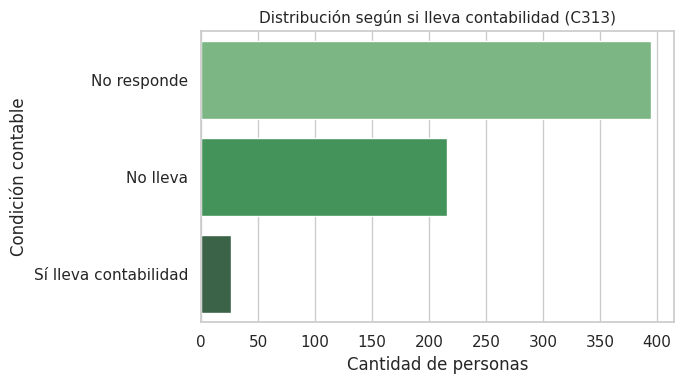

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Diccionario de mapeo
mapa_c313 = {
    1: 'Sí lleva contabilidad',
    2: 'No lleva',
    3: 'No sabe'
}

# Asegurar tipo numérico
trabajadores_mayores14['C313'] = pd.to_numeric(trabajadores_mayores14['C313'], errors='coerce')

# Crear columna de texto
trabajadores_mayores14['C313_texto'] = trabajadores_mayores14['C313'].map(mapa_c313).fillna('No responde')

# Crear tabla resumen (más robusta)
resumen_c313 = (
    trabajadores_mayores14['C313_texto']
    .value_counts()
    .reset_index()
)

# Asegurar nombres correctos
resumen_c313.columns = ['Condición contable', 'Cantidad']

# Mostrar tabla
print(" Distribución de personas según si llevan contabilidad (C313):\n")
print(resumen_c313.to_string(index=False))

# Gráfico
plt.figure(figsize=(7, 4))
sns.barplot(
    data=resumen_c313,
    x='Cantidad',
    y='Condición contable',
    palette='Greens_d'
)

plt.title("Distribución según si lleva contabilidad (C313)", fontsize=11)
plt.xlabel("Cantidad de personas")
plt.ylabel("Condición contable")
plt.tight_layout()
plt.show()


 Distribución según tamaño de la empresa o institución (C317):

    Tamaño de empresa  Cantidad
    Hasta 20 personas       335
  Más de 500 personas       170
De 101 a 500 personas        57
  De 21 a 50 personas        48
 De 51 a 100 personas        27


/tmp/ipython-input-2387462577.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




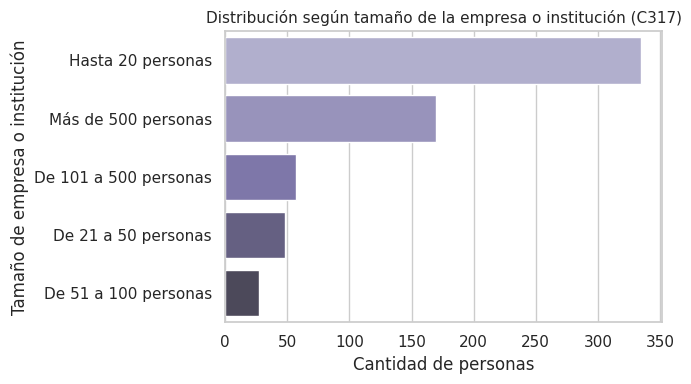

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Mapeo y conversión ---
mapa_c317 = {
    1: 'Hasta 20 personas',
    2: 'De 21 a 50 personas',
    3: 'De 51 a 100 personas',
    4: 'De 101 a 500 personas',
    5: 'Más de 500 personas'
}

# Convertir y mapear
trabajadores_mayores14['C317'] = pd.to_numeric(trabajadores_mayores14['C317'], errors='coerce')
trabajadores_mayores14['C317_texto'] = trabajadores_mayores14['C317'].map(mapa_c317).fillna('No responde')

# --- 2. Crear tabla resumen ---
resumen_c317 = (
    trabajadores_mayores14['C317_texto']
    .value_counts()
    .reset_index()
)
resumen_c317.columns = ['Tamaño de empresa', 'Cantidad']

# --- 3. Mostrar tabla ---
print(" Distribución según tamaño de la empresa o institución (C317):\n")
print(resumen_c317.to_string(index=False))

# --- 4. Gráfico de barras horizontal ---
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")
sns.barplot(
    data=resumen_c317,
    x='Cantidad',
    y='Tamaño de empresa',
    palette='Purples_d'
)

plt.title("Distribución según tamaño de la empresa o institución (C317)", fontsize=11)
plt.xlabel("Cantidad de personas")
plt.ylabel("Tamaño de empresa o institución")
plt.tight_layout()
plt.show()


In [111]:
import pandas as pd

# --- Asegurar que las variables estén creadas ---

# Ocupación principal (C310)
if 'C310_texto' not in trabajadores_mayores14.columns:
    mapa_c310 = {
        1: 'Empleador',
        2: 'Independiente',
        3: 'Empleado/Obrero',
        4: 'Ayudante familiar',
        5: 'Ayudante empleo familiar',
        6: 'Trabajador del hogar',
        7: 'Aprendiz remunerado',
        8: 'Practicante no remunerado',
        9: 'Ayudante otro hogar',
        10: 'Ayudante empleo otro hogar'
    }
    trabajadores_mayores14['C310'] = pd.to_numeric(trabajadores_mayores14['C310'], errors='coerce')
    trabajadores_mayores14['C310_texto'] = trabajadores_mayores14['C310'].map(mapa_c310).fillna('No responde')

# Tipo de empleador (C311)
if 'C311_texto' not in trabajadores_mayores14.columns:
    mapa_c311 = {
        1: 'FF.AA./PNP',
        2: 'Administración pública',
        3: 'Empresa pública',
        4: 'Empresa de servicios',
        5: 'Empresa/patrono privado',
        6: 'Otro'
    }
    trabajadores_mayores14['C311'] = pd.to_numeric(trabajadores_mayores14['C311'], errors='coerce')
    trabajadores_mayores14['C311_texto'] = trabajadores_mayores14['C311'].map(mapa_c311).fillna('No responde')

# Registro SUNAT (C312)
if 'C312_texto' not in trabajadores_mayores14.columns:
    mapa_c312 = {
        1: 'Persona jurídica',
        2: 'Persona natural con RUC',
        3: 'No registrado',
        4: 'No sabe'
    }
    trabajadores_mayores14['C312'] = pd.to_numeric(trabajadores_mayores14['C312'], errors='coerce')
    trabajadores_mayores14['C312_texto'] = trabajadores_mayores14['C312'].map(mapa_c312).fillna('No responde')

# Lleva contabilidad (C313)
if 'C313_texto' not in trabajadores_mayores14.columns:
    mapa_c313 = {
        1: 'Sí lleva contabilidad',
        2: 'No lleva',
        3: 'No sabe'
    }
    trabajadores_mayores14['C313'] = pd.to_numeric(trabajadores_mayores14['C313'], errors='coerce')
    trabajadores_mayores14['C313_texto'] = trabajadores_mayores14['C313'].map(mapa_c313).fillna('No responde')

# Tamaño del lugar de trabajo (C317)
if 'C317_texto' not in trabajadores_mayores14.columns:
    mapa_c317 = {
        1: 'Hasta 20 personas',
        2: 'De 21 a 50 personas',
        3: 'De 51 a 100 personas',
        4: 'De 101 a 500 personas',
        5: 'Más de 500 personas'
    }
    trabajadores_mayores14['C317'] = pd.to_numeric(trabajadores_mayores14['C317'], errors='coerce')
    trabajadores_mayores14['C317_texto'] = trabajadores_mayores14['C317'].map(mapa_c317).fillna('No responde')

# --- Cruces principales ---
def tabla_cruce(col1, col2, titulo):
    tabla = pd.crosstab(trabajadores_mayores14[col1], trabajadores_mayores14[col2],
                        margins=True, normalize='index') * 100
    print(f"\n {titulo} (% por fila):")
    display(tabla.round(1))

tabla_cruce('C310_texto', 'C313_texto', 'Ocupación vs Contabilidad')
tabla_cruce('C317_texto', 'C312_texto', 'Tamaño del lugar de trabajo vs Registro SUNAT')
tabla_cruce('C311_texto', 'C313_texto', 'Tipo de empleador vs Contabilidad')



 Ocupación vs Contabilidad (% por fila):


C313_texto,No lleva,No responde,Sí lleva contabilidad
C310_texto,,,
Ayudante familiar,88.9,0.0,11.1
Empleado/Obrero,15.8,80.4,3.9
Empleador,28.1,62.5,9.4
Independiente,92.9,3.6,3.6
Practicante no remunerado,0.0,100.0,0.0
Trabajador del hogar,0.0,100.0,0.0
All,33.9,62.0,4.1



 Tamaño del lugar de trabajo vs Registro SUNAT (% por fila):


C312_texto,No registrado,No responde,Persona jurídica,Persona natural con RUC
C317_texto,,,,
De 101 a 500 personas,0.0,0.0,100.0,0.0
De 21 a 50 personas,0.0,0.0,100.0,0.0
De 51 a 100 personas,0.0,0.0,100.0,0.0
Hasta 20 personas,45.7,5.1,22.7,26.6
Más de 500 personas,0.0,54.7,45.3,0.0
All,24.0,17.3,44.7,14.0



 Tipo de empleador vs Contabilidad (% por fila):


C313_texto,No lleva,No responde,Sí lleva contabilidad
C311_texto,,,
Administración pública,0.0,100.0,0.0
Empresa de servicios,0.0,100.0,0.0
Empresa pública,0.0,100.0,0.0
Empresa/patrono privado,20.9,73.9,5.2
FF.AA./PNP,0.0,100.0,0.0
No responde,74.2,21.2,4.5
All,33.9,62.0,4.1


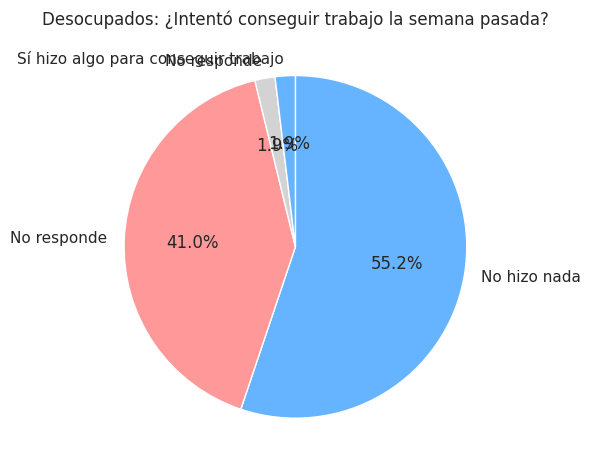

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar a mayores de 14 años ocupados o desocupados
df_mas14 = df_limpio[(df_limpio['C303'] == 1) | (df_limpio['C303'] == 2)]

# Filtrar solo a los desocupados
df_desocupados = df_mas14[df_mas14['C303'] == 2]

# Conteo de respuestas a la pregunta C304
conteos = df_desocupados['C304'].value_counts(dropna=False)

# Mapeo de etiquetas
mapa_c304 = {1: 'Sí hizo algo para conseguir trabajo', 2: 'No hizo nada'}
etiquetas = [mapa_c304.get(i, 'No responde') for i in conteos.index]

# Gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(
    conteos,
    labels=etiquetas,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=['#66b3ff', '#ff9999', '#d3d3d3']  # azul, rojo, gris
)
plt.title('Desocupados: ¿Intentó conseguir trabajo la semana pasada?', fontsize=12)
plt.tight_layout()
plt.show()


In [115]:
# Mostrar todas las columnas completas que puedan estar relacionadas con educación o tipo de trabajo
[col for col in df_mas14.columns if 'C30' in col or 'EDU' in col.upper()]


['C300n',
 'C301_DIA',
 'C301_MES',
 'C301_ANIO',
 'C303',
 'C304',
 'C305',
 'C306_1',
 'C306_2',
 'C306_3',
 'C306_4',
 'C306_5',
 'C306_6',
 'C306_7',
 'C306_8',
 'C306_9',
 'C306_10',
 'C306_10A',
 'C306_11',
 'C306A',
 'C308_COD',
 'C309_COD']